# –ê–Ω–∞–ª–∏–∑ –≤–ª–∏—è–Ω–∏—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤ –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞

–¶–µ–ª—å –¥–∞–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ - –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∫–∞–∫–∏–µ —Ñ–∞–∫—Ç–æ—Ä—ã –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –≤–ª–∏—è—é—Ç –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–µ–≥–æ —Å–Ω–∞, —Ç–∞–∫ –∫–∞–∫ –≤ –ø–æ—Å–ª–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è —è —Å—Ç–∞–ª–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Ö—É–∂–µ –≤—ã—Å—ã–ø–∞—Ç—å—Å—è.  
–û—Å–Ω–æ–≤–Ω–∞—è —á–∞—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö –±—ã–ª–∞ –≤–∑—è—Ç–∞ –∏–∑ —Ñ–∏—Ç–Ω–µ—Å-–±—Ä–∞—Å–ª–µ—Ç–∞, –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —Å–æ–±–∏—Ä–∞–ª–∏—Å—å –≤—Ä—É—á–Ω—É—é –ø–æ –µ–∂–µ–¥–Ω–µ–≤–Ω—ã–º –Ω–∞–±–ª—é–¥–µ–Ω–∏—è–º.

–ó–∞–≥—Ä—É–∂–∞–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏:

In [1]:
%load_ext sql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import json

from statsmodels.stats.multicomp import pairwise_tukeyhsd

### –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–¢–∞ —á–∞—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä–∞—è —Å–æ–±–∏—Ä–∞–ª–∞—Å—å –≤—Ä—É—á–Ω—É—é, —Ö—Ä–∞–Ω–∏—Ç—Å—è –≤ –±–∞–∑–µ –¥–∞–Ω–Ω—ã—Ö Postgre. 
–ë—ã–ª–æ –±—ã –ª–µ–≥—á–µ —Å–æ–±–∏—Ä–∞—Ç—å —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ –≤ csv –¥–æ–∫—É–º–µ–Ω—Ç—ã, –Ω–æ –º–Ω–µ —Ö–æ—Ç–µ–ª–æ—Å—å –ø–æ–ø—Ä–∞–∫—Ç–∏–∫–æ–≤–∞—Ç—å—Å—è –≤ SQL –∏ –ø–æ–¥–∫–ª—é—á–µ–Ω–∏–∏ –±–∞–∑—ã –¥–∞–Ω–Ω—ã—Ö –∫ –Ω–æ—É—Ç–±—É–∫—É.

–î–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —ç—Ç–∏—Ö —Ç–∞–±–ª–∏—Ü, —É—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—é –ø–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –∫ –±–∞–∑–µ –¥–∞–Ω–Ω—ã—Ö:

In [2]:
# Postgres username, password, and database name
POSTGRES_ADDRESS = 'localhost' 
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres'
POSTGRES_PASSWORD = '****'
POSTGRES_DBNAME = 'health_project'

cnx = create_engine(f'postgresql://{POSTGRES_USERNAME}:{POSTGRES_PASSWORD}@{POSTGRES_ADDRESS}:{POSTGRES_PORT}/{POSTGRES_DBNAME}')

In [3]:
df_day = pd.read_sql_query('''SELECT * FROM health_metrics.day_metrics;''', cnx)
df_day.head()

date  water_ml  coffee_ml  coffee_after_8pm  tea_ml  tea_after_8pm   
0  2022-11-03      1000       1000             False     300          False  \
1  2022-11-04       800       1000             False     300           True   
2  2022-11-05       400       1000             False     300           True   
3  2022-11-06      1200       1000             False     600           True   
4  2022-11-07       600       1500              True       0          False   

  last_meal_time  exercise  menstrual_cycle_day  atmospheric_pressure  
0       19:54:00     False                   25                   758  
1       22:35:00      True                   26                   757  
2       23:22:00     False                   27                   763  
3       19:20:00      True                   28                   765  
4       21:43:00     False                    1                   762

–í –ø–µ—Ä–≤–æ–π —Ç–∞–±–ª–∏—Ü–µ —Ö—Ä–∞–Ω—è—Ç—Å—è –º–µ—Ç—Ä–∏–∫–∏, —Å–æ–±—Ä–∞–Ω–Ω—ã–µ –∑–∞ –¥–µ–Ω—å:
- –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–Ω–æ–π –≤–æ–¥—ã, —Ç.–∫. –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–Ω–æ–π –∂–∏–¥–∫–æ—Å—Ç–∏ –º–æ–∂–µ—Ç –≤–ª–∏—è—Ç—å –Ω–∞ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –æ—Ä–≥–∞–Ω–∏–∑–º–∞;
- –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–ø–∏—Ç—ã—Ö –∫–æ—Ñ–µ –∏ —á–∞—è, –∞ —Ç–∞–∫–∂–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ç–æ–º, —É–ø–æ—Ç—Ä–µ–±–ª—è–ª–∞ –ª–∏ —è –∏—Ö –ø–æ—Å–ª–µ 20:00, —Ç.–∫. —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –º–Ω–µ–Ω–∏–µ, —á—Ç–æ –∫–æ—Ñ–µ–∏–Ω –º–æ–∂–µ—Ç –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ –≤–ª–∏—è—Ç—å –Ω–∞ —Å–æ–Ω;
- –≤—Ä–µ–º—è –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –ø—Ä–∏–µ–º–∞ –ø–∏—â–∏ - –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, —á—Ç–æ –ø–æ–∑–¥–Ω–∏–π –ø—Ä–∏–µ–º –ø–∏—â–∏ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ —É—Ö—É–¥—à–µ–Ω–∏—é —Å–Ω–∞;
- –±—ã–ª–∏ –ª–∏ –≤ —ç—Ç–æ—Ç –¥–µ–Ω—å —Ñ–∏–∑–∏—á–µ—Å–∫–∏–µ –Ω–∞–≥—Ä—É–∑–∫–∏ (—Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∞) - –≤–æ–∑–º–æ–∂–Ω–æ, –æ–Ω–∏ –º–æ–≥—É—Ç –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞;
- –¥–µ–Ω—å –º–µ–Ω—Å—Ç—Ä—É–∞–ª—å–Ω–æ–≥–æ —Ü–∏–∫–ª–∞ - —è –∑–∞–º–µ—Ç–∏–ª–∞, —á—Ç–æ –ø–µ—Ä–µ–¥ –Ω–∞—á–∞–ª–æ–º –Ω–æ–≤–æ–≥–æ —Ü–∏–∫–ª–∞ —É –º–µ–Ω—è –∏–Ω–æ–≥–¥–∞ –±—ã–≤–∞–µ—Ç –±–µ—Å—Å–æ–Ω–Ω–∏—Ü–∞;
- –∞—Ç–º–æ—Å—Ñ–µ—Ä–Ω–æ–µ –¥–∞–≤–ª–µ–Ω–∏–µ - –±—ã—Ç—É–µ—Ç –º–Ω–µ–Ω–∏–µ, —á—Ç–æ –ø–æ–≥–æ–¥–∞ –º–æ–∂–µ—Ç –≤–ª–∏—è—Ç—å –Ω–∞ —Å–∞–º–æ—á—É–≤—Å—Ç–≤–∏–µ, —á—Ç–æ –≤ —Å–≤–æ—é –æ—á–µ—Ä–µ–¥—å –º–æ–∂–µ—Ç –≤–ª–∏—è—Ç—å –Ω–∞ —Å–æ–Ω.

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  177 non-null    object
 1   water_ml              177 non-null    int64 
 2   coffee_ml             177 non-null    int64 
 3   coffee_after_8pm      177 non-null    bool  
 4   tea_ml                177 non-null    int64 
 5   tea_after_8pm         177 non-null    bool  
 6   last_meal_time        177 non-null    object
 7   exercise              177 non-null    bool  
 8   menstrual_cycle_day   177 non-null    int64 
 9   atmospheric_pressure  177 non-null    int64 
dtypes: bool(3), int64(5), object(2)
memory usage: 10.3+ KB


–í—Ä–µ–º—è –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –ø—Ä–∏–µ–º–∞ –ø–∏—â–∏ –±—ã–ª–æ –∑–∞–≥—Ä—É–∂–µ–Ω–æ –∫–∞–∫ –æ–±—ä–µ–∫—Ç, –ø–µ—Ä–µ–≤–µ–¥–µ–º –µ–≥–æ –≤ —Ñ–æ—Ä–º–∞—Ç *datetime*.
–¢–∞–∫–∂–µ, —Å–¥–µ–ª–∞–µ–º –¥–∞—Ç—É –∏–Ω–¥–µ–∫—Å–æ–º –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞.

In [5]:
df_day['last_meal_time'] = (df_day['date'].astype(str) + ' ' + df_day['last_meal_time'].astype(str)).astype('datetime64[s]')
df_day.set_index('date', drop=True, inplace=True)
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 2022-11-03 to 2022-12-21
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype        
---  ------                --------------  -----        
 0   water_ml              177 non-null    int64        
 1   coffee_ml             177 non-null    int64        
 2   coffee_after_8pm      177 non-null    bool         
 3   tea_ml                177 non-null    int64        
 4   tea_after_8pm         177 non-null    bool         
 5   last_meal_time        177 non-null    datetime64[s]
 6   exercise              177 non-null    bool         
 7   menstrual_cycle_day   177 non-null    int64        
 8   atmospheric_pressure  177 non-null    int64        
dtypes: bool(3), datetime64[s](1), int64(5)
memory usage: 10.2+ KB


–í–æ –≤—Ç–æ—Ä–æ–π —Ç–∞–±–ª–∏—Ü–µ —Ö—Ä–∞–Ω—è—Ç—Å—è –≤—Ä–µ–º—è, –≤ –∫–æ—Ç–æ—Ä–æ–µ —è –ø–æ—à–ª–∞ —Å–ø–∞—Ç—å, –∞ —Ç–∞–∫–∂–µ —Å—É–±—ä–µ–∫—Ç–∏–≤–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ —Å–Ω–∞ –ø–æ 10-–±–∞–ª–ª—å–Ω–æ–π —à–∫–∞–ª–µ (–æ—Å–Ω–æ–≤–∞–Ω–∞ –Ω–∞ —Ç–æ–º, ***–∞.*** –Ω–∞—Å–∫–æ–ª—å–∫–æ –ª–µ–≥–∫–æ/—Ç—è–∂–µ–ª–æ –±—ã–ª–æ –ø—Ä–æ—Å–Ω—É—Ç—å—Å—è —É—Ç—Ä–æ–º –∏ ***–±.*** –Ω–∞—Å–∫–æ–ª—å–∫–æ —Å–æ–Ω–Ω–æ–π —è —Å–µ–±—è —á—É–≤—Å—Ç–≤–æ–≤–∞–ª–∞ –≤ –ø–µ—Ä–≤–æ–π –ø–æ–ª–æ–≤–∏–Ω–µ –¥–Ω—è)

In [6]:
df_next_day = pd.read_sql_query('''SELECT * FROM health_metrics.next_day_metrics;''', cnx)
df_next_day.set_index('date', drop=True, inplace=True)
df_next_day.head()

sleep_quality    went_to_bed_time
date                                         
2022-11-03              6 2022-11-04 01:31:00
2022-11-04              9 2022-11-05 00:30:00
2022-11-05             10 2022-11-06 01:39:00
2022-11-06              5 2022-11-07 01:19:00
2022-11-07              4 2022-11-08 01:49:00

In [7]:
df_next_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 2022-11-03 to 2023-04-30
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sleep_quality     177 non-null    int64         
 1   went_to_bed_time  177 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.1+ KB


–û–±—ä–µ–¥–∏–Ω–∏–º –¥–≤–µ —Ç–∞–±–ª–∏—Ü—ã –≤–Ω–µ—à–Ω–∏–º –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ–º –Ω–∞ —Å–ª—É—á–∞–π, –µ—Å–ª–∏ —è –∑–∞–±—ã–ª–∞ –∑–∞–ø–æ–ª–Ω–∏—Ç—å –∫–∞–∫–æ–π-–ª–∏–±–æ –∏–∑ –¥–Ω–µ–π –≤ –æ–¥–Ω–æ–π –∏–∑ —Ç–∞–±–ª–∏—Ü:

In [8]:
df_full = df_day.join(df_next_day, how='outer')
df_full.head()

water_ml  coffee_ml  coffee_after_8pm  tea_ml  tea_after_8pm   
date                                                                       
2022-11-03      1000       1000             False     300          False  \
2022-11-04       800       1000             False     300           True   
2022-11-05       400       1000             False     300           True   
2022-11-06      1200       1000             False     600           True   
2022-11-07       600       1500              True       0          False   

                last_meal_time  exercise  menstrual_cycle_day   
date                                                            
2022-11-03 2022-11-03 19:54:00     False                   25  \
2022-11-04 2022-11-04 22:35:00      True                   26   
2022-11-05 2022-11-05 23:22:00     False                   27   
2022-11-06 2022-11-06 19:20:00      True                   28   
2022-11-07 2022-11-07 21:43:00     False                    1   

            atmospheric_pressure  sleep_quality    went_to_bed_time  
date                                                                 
2022-11-03                   758              6 2022-11-04 01:31:00  
2022-11-04                   757              9 2022-11-05 00:30:00  
2022-11-05                   763             10 2022-11-06 01:39:00  
2022-11-06                   765              5 2022-11-07 01:19:00  
2022-11-07                   762              4 2022-11-08 01:49:00

–î–∞–Ω–Ω—ã–µ –∏–∑ —Ñ–∏—Ç–Ω–µ—Å-–±—Ä–∞—Å–ª–µ—Ç–∞ Xiaomi Mi Band –±—ã–ª–∏ –ø–æ–ª—É—á–µ–Ω—ã –∏–∑ –∞–∫–∫–∞—É–Ω—Ç–∞ Xiaomi (https://account.xiaomi.com/fe/service/account) –≤–æ –≤–∫–ª–∞–¥–∫–µ Privacy.
–ó–∞–ø—Ä–æ—à–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –æ—Ç–ø—Ä–∞–≤–ª—è—é—Ç—Å—è –Ω–∞ —ç–ª–µ–∫—Ç—Ä–æ–Ω–Ω—É—é –ø–æ—á—Ç—É –≤ –≤–∏–¥–µ –¥–≤—É—Ö –∞—Ä—Ö–∏–≤–æ–≤ –≤ csv —Ñ–∞–π–ª–∞–º–∏. 
–ù—É–∂–Ω–∞—è –º–Ω–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è —Ö—Ä–∞–Ω–∏—Ç—Å—è –≤ –∞—Ä—Ö–∏–≤–µ *MiFitness_fr1_data_copy* –≤ —Ñ–∞–π–ª–µ –ø–æ–¥ –Ω–∞–∑–≤–∞–Ω–∏–µ–º *MiFitness_hlth_center_aggregated_fitness_data.csv* –≤ —Å–ª–µ–¥—É—é—â–µ–º –≤–∏–¥–µ:

| Classification | Field | Field Description |
|---|---|---|
| Identifier | uid | Mi Account ID |
| Identifier | sid | Data Source Identifier |
| User Activity Data | tag | Primary classification of aggregated fitness data |
| User Activity Data | key | Secondary classification of aggregated fitness data |
| User Activity Data | time | Generation time of aggregated fitness data |
| User Activity Data | update_time | Last modification time of data |
| Exercise and health information | value | Aggregated fitness record |

–ó–∞–≥—Ä—É–∑–∏–º –Ω—É–∂–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º.

In [9]:
df_band = pd.read_csv('MiFitness_hlth_center_aggregated_fitness_data.csv', usecols = ['Tag','Key', 'Time', 'Value'])
df_band.head()

Tag     Key        Time   
0  daily_report  stress  1667174400  \
1  daily_report  stress  1667260800   
2  daily_report  stress  1667347200   
3  daily_report  stress  1667433600   
4  daily_report  stress  1667520000   

                                               Value  
0  {"avg_stress":58,"max_stress":81,"min_stress":...  
1  {"avg_stress":56,"max_stress":82,"min_stress":...  
2  {"avg_stress":59,"max_stress":83,"min_stress":...  
3  {"avg_stress":57,"max_stress":75,"min_stress":...  
4  {"avg_stress":58,"max_stress":80,"min_stress":...

–ü–µ—Ä–µ–≤–µ–¥–µ–º –≤—Ä–µ–º—è –≤ –±–æ–ª–µ–µ —á–∏—Ç–∞–µ–º—ã–π —Ñ–æ—Ä–º–∞—Ç:

In [10]:
df_band['Time'] = df_band['Time'].astype('datetime64[s]')
df_band.head()

Tag     Key       Time   
0  daily_report  stress 2022-10-31  \
1  daily_report  stress 2022-11-01   
2  daily_report  stress 2022-11-02   
3  daily_report  stress 2022-11-03   
4  daily_report  stress 2022-11-04   

                                               Value  
0  {"avg_stress":58,"max_stress":81,"min_stress":...  
1  {"avg_stress":56,"max_stress":82,"min_stress":...  
2  {"avg_stress":59,"max_stress":83,"min_stress":...  
3  {"avg_stress":57,"max_stress":75,"min_stress":...  
4  {"avg_stress":58,"max_stress":80,"min_stress":...

–¢–∞–∫ –∫–∞–∫ –≤—Å–µ –º–µ—Ç—Ä–∏–∫–∏ –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–æ —Å–∫–ª–µ–µ–Ω—ã –≤ –æ–¥–Ω—É —Ç–∞–±–ª–∏—Ü—É, –∞ –≤—Å–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —Å–æ–±—Ä–∞–Ω—ã –≤ —Ñ–æ—Ä–º–∞—Ç–µ json —Å —Ä–∞–∑–Ω—ã–º–∏ –∫–ª—é—á–∞–º–∏ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –º–µ—Ç—Ä–∏–∫, –∫–∞–∂–¥—É—é –º–µ—Ç—Ä–∏–∫—É –ø—Ä–∏–¥–µ—Ç—Å—è –¥–æ—Å—Ç–∞–≤–∞—Ç—å –∏–∑ —Ç–∞–±–ª–∏—Ü—ã –∏ –ø—Ä–∏–≤–æ–¥–∏—Ç—å –≤ –Ω—É–∂–Ω—ã–π –≤–∏–¥ –ø–æ –æ—Ç–¥–µ–ª—å–Ω–æ—Å—Ç–∏.

–°–æ–∑–¥–∞–¥–∏–º –¥–ª—è —ç—Ç–æ–≥–æ —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç –ø—Ä–∏–Ω–∏–º–∞—Ç—å —Å—Ç—Ä–æ–∫—É –∏–∑ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ –∏ –Ω—É–∂–Ω—ã–µ –∫–ª—é—á–∏ –∏ –ø–µ—Ä–µ–Ω–æ—Å–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –∏–∑ json –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏. –ê—Ä–≥—É–º–µ–Ω—Ç *new_keys* –¥–∞–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –∑–∞–¥–∞—Ç—å –Ω–∞–∑–≤–∞–Ω–∏—è –∫–æ–ª–æ–Ω–æ–∫ –æ—Ç–ª–∏—á–Ω–æ–µ –æ—Ç –∫–ª—é—á–µ–π json.

In [11]:
def parse_data(data, keys, new_keys=None):
    if not new_keys:
        new_keys = keys

    val = json.loads(data.Value)

    for key, nkey in zip(keys, new_keys):
        data[nkey] = val[key]
        data[nkey] = val[key]
        data[nkey] = val[key]

    return data

#### –ü–µ—Ä–≤–∞—è –º–µ—Ç—Ä–∏–∫–∞ - —Å—Ç—Ä–µ—Å—Å

In [12]:
df_stress = df_band[(df_band['Key'] == 'stress') & (df_band['Tag'] == 'daily_report')][['Time', 'Value']]
df_stress.head()

Time                                              Value
0 2022-10-31  {"avg_stress":58,"max_stress":81,"min_stress":...
1 2022-11-01  {"avg_stress":56,"max_stress":82,"min_stress":...
2 2022-11-02  {"avg_stress":59,"max_stress":83,"min_stress":...
3 2022-11-03  {"avg_stress":57,"max_stress":75,"min_stress":...
4 2022-11-04  {"avg_stress":58,"max_stress":80,"min_stress":...

–í—ã–¥–µ–ª–∏–º –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π, —Å—Ä–µ–¥–Ω–∏–π –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å —Å—Ç—Ä–µ—Å—Å–∞ –∑–∞ –¥–µ–Ω—å –ø—Ä–∏ –ø–æ–º–æ—â–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –≤—ã—à–µ.
–¢–∞–∫–∂–µ —Å–¥–µ–ª–∞–µ–º –≤—Ä–µ–º—è –∏–Ω–¥–µ–∫—Å–æ–º –∏ –ø–µ—Ä–µ–∏–º–µ–Ω—É–µ–º –µ–≥–æ –≤ *date*, —á—Ç–æ–±—ã –±—ã–ª–æ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –ª–µ–≥—á–µ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å —ç—Ç–æ—Ç –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –¥—Ä—É–≥–∏–º–∏.

In [13]:
keys = ['min_stress', 'avg_stress', 'max_stress']
df_stress = df_stress.apply(parse_data, args=(keys,), axis=1)
df_stress.set_index('Time', drop=True, inplace=True)
df_stress.index.name = 'date'
df_stress.head()

Value  min_stress   
date                                                                        
2022-10-31  {"avg_stress":58,"max_stress":81,"min_stress":...          25  \
2022-11-01  {"avg_stress":56,"max_stress":82,"min_stress":...          23   
2022-11-02  {"avg_stress":59,"max_stress":83,"min_stress":...          49   
2022-11-03  {"avg_stress":57,"max_stress":75,"min_stress":...          23   
2022-11-04  {"avg_stress":58,"max_stress":80,"min_stress":...          50   

            avg_stress  max_stress  
date                                
2022-10-31          58          81  
2022-11-01          56          82  
2022-11-02          59          83  
2022-11-03          57          75  
2022-11-04          58          80

–û–±—ä–µ–¥–∏–Ω–∏–º —ç—Ç—É —Ç–∞–±–ª–∏—Ü—É —Å –ø–µ—Ä–≤—ã–º–∏ –¥–≤—É–º—è –≤–Ω–µ—à–Ω–∏–º –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ–º, —Ç.–∫. —Å –æ–¥–Ω–æ–π —Å—Ç–æ—Ä–æ–Ω—ã, —Ñ–∏—Ç–Ω–µ—Å-–±—Ä–∞—Å–ª–µ—Ç–æ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞—á–∞–ª–∏ —Å–æ–±–∏—Ä–∞—Ç—å—Å—è —Ä–∞–Ω—å—à–µ, —á–µ–º —è –Ω–∞—á–∞–ª–∞ –≤—Ä—É—á–Ω—É—é —Å–æ–±–∏—Ä–∞—Ç—å –¥—Ä—É–≥–∏–µ –º–µ—Ç—Ä–∏–∫–∏; —Å –¥—Ä—É–≥–æ–π —Å—Ç–æ—Ä–æ–Ω—ã, –±—ã–ª –¥–µ–Ω—å (–∏–ª–∏ –º–æ–∂–µ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ?) –∫–æ–≥–¥–∞ —è –Ω–µ –Ω–æ—Å–∏–ª–∞ —Ñ–∏—Ç–Ω–µ—Å-–±—Ä–∞—Å–ª–µ—Ç.

–û—Å—Ç–∞–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –±—É–¥—É—Ç –ø—Ä–∏—Å–æ–µ–¥–∏–Ω–µ–Ω—ã —á–µ—Ä–µ–∑ left join.

In [14]:
df_full = df_full.join(df_stress[['min_stress',	'avg_stress', 'max_stress']], how='outer')
df_full.head()

water_ml  coffee_ml coffee_after_8pm  tea_ml tea_after_8pm   
date                                                                     
2022-10-31       NaN        NaN              NaN     NaN           NaN  \
2022-11-01       NaN        NaN              NaN     NaN           NaN   
2022-11-02       NaN        NaN              NaN     NaN           NaN   
2022-11-03    1000.0     1000.0            False   300.0         False   
2022-11-04     800.0     1000.0            False   300.0          True   

                last_meal_time exercise  menstrual_cycle_day   
date                                                           
2022-10-31                 NaT      NaN                  NaN  \
2022-11-01                 NaT      NaN                  NaN   
2022-11-02                 NaT      NaN                  NaN   
2022-11-03 2022-11-03 19:54:00    False                 25.0   
2022-11-04 2022-11-04 22:35:00     True                 26.0   

            atmospheric_pressure  sleep_quality    went_to_bed_time   
date                                                                  
2022-10-31                   NaN            NaN                 NaT  \
2022-11-01                   NaN            NaN                 NaT   
2022-11-02                   NaN            NaN                 NaT   
2022-11-03                 758.0            6.0 2022-11-04 01:31:00   
2022-11-04                 757.0            9.0 2022-11-05 00:30:00   

            min_stress  avg_stress  max_stress  
date                                            
2022-10-31        25.0        58.0        81.0  
2022-11-01        23.0        56.0        82.0  
2022-11-02        49.0        59.0        83.0  
2022-11-03        23.0        57.0        75.0  
2022-11-04        50.0        58.0        80.0

–î–µ–ª–∞–µ–º —Ç–æ –∂–µ —Å–∞–º–æ–µ –¥–ª—è –¥—Ä—É–≥–∏—Ö –º–µ—Ç—Ä–∏–∫.

#### –®–∞–≥–∏

***steps*** - –ø—Ä–æ–π–¥–µ–Ω–Ω—ã–µ –∑–∞ –¥–µ–Ω—å —à–∞–≥–∏

In [15]:
df_steps = df_band[(df_band['Key'] == 'steps') & (df_band['Tag'] == 'daily_report')][['Time', 'Value']]
df_steps = df_steps.apply(parse_data, args=(['steps'],), axis=1)
df_steps.set_index('Time', drop=True, inplace=True)
df_steps.index.name = 'date'
df_steps.head()

Value  steps
date                                                           
2022-10-30     {"calories":17,"distance":86,"steps":153}    153
2022-10-31    {"calories":59,"distance":306,"steps":543}    543
2022-11-01     {"calories":20,"distance":58,"steps":123}    123
2022-11-02  {"calories":211,"distance":517,"steps":1028}   1028
2022-11-03    {"calories":37,"distance":115,"steps":237}    237

#### SPO_2

***avg_spo2*** - —Å—Ä–µ–¥–Ω–∏–π –∑–∞ –¥–µ–Ω—å —É—Ä–æ–≤–µ–Ω—å –Ω–∞—Å—ã—â–µ–Ω–∏—è –∫—Ä–æ–≤–∏ –∫–∏—Å–ª–æ—Ä–æ–¥–æ–º

In [16]:
df_spo = df_band[(df_band['Key'] == 'spo2') & (df_band['Tag'] == 'daily_report')][['Time', 'Value']]
df_spo = df_spo.apply(parse_data, args=(['avg_spo2'],), axis=1)
df_spo.set_index('Time', drop=True, inplace=True)
df_spo.index.name = 'date'
df_spo.head() 

Value  avg_spo2
date                                                                   
2022-10-30  {"avg_spo2":97,"lack_spo2_count":0,"max_spo2":...        97
2022-10-31  {"avg_spo2":94,"lack_spo2_count":0,"max_spo2":...        94
2022-11-01  {"avg_spo2":92,"lack_spo2_count":0,"max_spo2":...        92
2022-11-02  {"avg_spo2":93,"lack_spo2_count":0,"max_spo2":...        93
2022-11-03  {"avg_spo2":93,"lack_spo2_count":0,"max_spo2":...        93

#### –ß–∞—Å—Ç–æ—Ç–∞ —Å–µ—Ä–¥—Ü–µ–±–∏–µ–Ω–∏—è

***min_heart_rate*** - –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –ø—É–ª—å—Å –∑–∞ –¥–µ–Ω—å  
***avg_heart_rate*** - —Å—Ä–µ–¥–Ω–∏–π –ø—É–ª—å—Å –∑–∞ –¥–µ–Ω—å  
***max_heart_rate*** - –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –ø—É–ª—å—Å –∑–∞ –¥–µ–Ω—å  

In [17]:
df_pulse = df_band[(df_band['Key'] == 'heart_rate') & (df_band['Tag'] == 'daily_report')][['Time', 'Value']]

keys = ['min_hr', 'avg_hr', 'max_hr']
new_keys = ['min_heart_rate', 'avg_heart_rate', 'max_heart_rate']
df_pulse = df_pulse.apply(parse_data, args=(keys, new_keys), axis=1)

df_pulse.set_index('Time', drop=True, inplace=True)
df_pulse.index.name = 'date'
df_pulse.head()

Value  min_heart_rate   
date                                                                            
2022-10-30  {"abnormal_hr_count":0,"avg_hr":100,"avg_rhr":...              78  \
2022-10-31  {"abnormal_hr_count":0,"avg_hr":87,"avg_rhr":8...              64   
2022-11-01  {"abnormal_hr_count":0,"avg_hr":85,"avg_rhr":8...              70   
2022-11-02  {"abnormal_hr_count":0,"avg_hr":94,"avg_rhr":9...              66   
2022-11-03  {"abnormal_hr_count":0,"avg_hr":91,"avg_rhr":8...              73   

            avg_heart_rate  max_heart_rate  
date                                        
2022-10-30             100             113  
2022-10-31              87             131  
2022-11-01              85             130  
2022-11-02              94             169  
2022-11-03              91             131

#### –ö–∞–ª–æ—Ä–∏–∏

***calories*** - —Å–æ–∂–∂–µ–Ω–Ω—ã–µ –∑–∞ –¥–µ–Ω—å –∫–∞–ª–æ—Ä–∏–∏

In [18]:
df_calories = df_band[(df_band['Key'] == 'calories') & (df_band['Tag'] == 'daily_report')][['Time', 'Value']]
df_calories = df_calories.apply(parse_data, args=(['calories'],), axis=1)
df_calories.set_index('Time', drop=True, inplace=True)
df_calories.index.name = 'date'
df_calories.head()

Value  calories
date                                  
2022-10-30   {"calories":65}        65
2022-10-31  {"calories":579}       579
2022-11-01  {"calories":184}       184
2022-11-02  {"calories":851}       851
2022-11-03  {"calories":470}       470

#### –°–æ–Ω

In [19]:
df_sleep = df_band[(df_band['Key'] == 'sleep') & (df_band['Tag'] == 'daily_report')][['Time', 'Value']]
df_sleep.head()

Time                                              Value
719 2022-10-31  {"avg_hr":83,"avg_spo2":94,"day_sleep_evaluati...
720 2022-11-01  {"avg_hr":82,"avg_spo2":91,"day_sleep_evaluati...
721 2022-11-02  {"avg_hr":85,"avg_spo2":94,"day_sleep_evaluati...
722 2022-11-03  {"avg_hr":84,"avg_spo2":93,"day_sleep_evaluati...
723 2022-11-04  {"avg_hr":83,"avg_spo2":91,"day_sleep_evaluati...

–î–ª—è —Ä–∞–∑–±–æ—Ä–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π —Å–Ω–∞ –ø—Ä–∏—à–ª–æ—Å—å —Å–æ–∑–¥–∞–≤–∞—Ç—å –æ—Ç–¥–µ–ª—å–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é –∏–∑-–∑–∞ –≤–ª–æ–∂–µ–Ω–Ω—ã—Ö —Å–ø–∏—Å–∫–æ–≤ –≤ json –æ–±—ä–µ–∫—Ç–µ.

***sleep_duartion*** - –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞  
***sleep_score*** - –æ—Ü–µ–Ω–∫–∞ —Å–Ω–∞, –ø–µ—Ä–µ–≤–µ–¥–µ–Ω–Ω–∞—è –≤ 10-–±–∞–ª–ª—å–Ω—É—é —Å–∏—Å—Ç–µ–º—É   
***wake_up_time*** - –≤—Ä–µ–º—è –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è  

In [20]:
def parse_sleep(data):
    val = json.loads(data.Value)
    data['sleep_duration'] = val['total_duration']
    data['sleep_score'] = val['sleep_score']/10

    val = val['segment_details'][-1]
    data['wake_up_time'] = val['wake_up_time']

    return data

df_sleep = df_sleep.apply(parse_sleep, axis=1)


–¢–∞–∫–∂–µ –ø–µ—Ä–µ–≤–µ–¥–µ–º –≤—Ä–µ–º—è –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è –≤ *datetime*:

In [21]:
df_sleep['wake_up_time'] = df_sleep['wake_up_time'].astype('datetime64[s]') + pd.DateOffset(hours=3)

df_sleep['Time'] = df_sleep['Time'] - pd.DateOffset(days=1)
df_sleep.set_index('Time', drop=True, inplace=True)
df_sleep.index.name = 'date'

df_sleep.head()

Value  sleep_duration   
date                                                                            
2022-10-30  {"avg_hr":83,"avg_spo2":94,"day_sleep_evaluati...             349  \
2022-10-31  {"avg_hr":82,"avg_spo2":91,"day_sleep_evaluati...             362   
2022-11-01  {"avg_hr":85,"avg_spo2":94,"day_sleep_evaluati...             328   
2022-11-02  {"avg_hr":84,"avg_spo2":93,"day_sleep_evaluati...             333   
2022-11-03  {"avg_hr":83,"avg_spo2":91,"day_sleep_evaluati...             320   

            sleep_score        wake_up_time  
date                                         
2022-10-30          8.2 2022-10-31 06:30:00  
2022-10-31          8.1 2022-11-01 06:30:00  
2022-11-01          8.2 2022-11-02 06:46:00  
2022-11-02          8.1 2022-11-03 06:31:00  
2022-11-03          8.1 2022-11-04 07:02:00

#### –û–±—ä–µ–¥–∏–Ω–∏–º –≤—Å–µ —Ç–∞–±–ª–∏—Ü—ã

In [22]:
df_full = df_full.join([df_steps[['steps']], 
                        df_spo[['avg_spo2']],
                        df_pulse[['min_heart_rate', 'avg_heart_rate', 'max_heart_rate']],
                        df_calories[['calories']],
                        df_sleep[['wake_up_time', 'sleep_duration', 'sleep_score']]], 
                       how='left')
df_full.head()

water_ml  coffee_ml coffee_after_8pm  tea_ml tea_after_8pm   
date                                                                     
2022-10-31       NaN        NaN              NaN     NaN           NaN  \
2022-11-01       NaN        NaN              NaN     NaN           NaN   
2022-11-02       NaN        NaN              NaN     NaN           NaN   
2022-11-03    1000.0     1000.0            False   300.0         False   
2022-11-04     800.0     1000.0            False   300.0          True   

                last_meal_time exercise  menstrual_cycle_day   
date                                                           
2022-10-31                 NaT      NaN                  NaN  \
2022-11-01                 NaT      NaN                  NaN   
2022-11-02                 NaT      NaN                  NaN   
2022-11-03 2022-11-03 19:54:00    False                 25.0   
2022-11-04 2022-11-04 22:35:00     True                 26.0   

            atmospheric_pressure  sleep_quality  ... max_stress   steps   
date                                             ...                      
2022-10-31                   NaN            NaN  ...       81.0   543.0  \
2022-11-01                   NaN            NaN  ...       82.0   123.0   
2022-11-02                   NaN            NaN  ...       83.0  1028.0   
2022-11-03                 758.0            6.0  ...       75.0   237.0   
2022-11-04                 757.0            9.0  ...       80.0  1034.0   

            avg_spo2  min_heart_rate  avg_heart_rate  max_heart_rate   
date                                                                   
2022-10-31      94.0            64.0            87.0           131.0  \
2022-11-01      92.0            70.0            85.0           130.0   
2022-11-02      93.0            66.0            94.0           169.0   
2022-11-03      93.0            73.0            91.0           131.0   
2022-11-04      90.0            62.0            95.0           182.0   

            calories        wake_up_time  sleep_duration  sleep_score  
date                                                                   
2022-10-31     579.0 2022-11-01 06:30:00           362.0          8.1  
2022-11-01     184.0 2022-11-02 06:46:00           328.0          8.2  
2022-11-02     851.0 2022-11-03 06:31:00           333.0          8.1  
2022-11-03     470.0 2022-11-04 07:02:00           320.0          8.1  
2022-11-04     816.0 2022-11-05 09:02:00           511.0          8.4  

[5 rows x 23 columns]

In [23]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2022-10-31 to 2023-05-01
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   water_ml              177 non-null    float64       
 1   coffee_ml             177 non-null    float64       
 2   coffee_after_8pm      177 non-null    object        
 3   tea_ml                177 non-null    float64       
 4   tea_after_8pm         177 non-null    object        
 5   last_meal_time        177 non-null    datetime64[s] 
 6   exercise              177 non-null    object        
 7   menstrual_cycle_day   177 non-null    float64       
 8   atmospheric_pressure  177 non-null    float64       
 9   sleep_quality         177 non-null    float64       
 10  went_to_bed_time      177 non-null    datetime64[ns]
 11  min_stress            179 non-null    float64       
 12  avg_stress            179 non-null    float64       
 13  m

–í–æ –≤—Å–µ—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö –µ—Å—Ç—å –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è. –ü–æ—Å–º–æ—Ç—Ä–∏–º, –≤ –∫–∞–∫–∏—Ö —Å—Ç—Ä–æ–∫–∞—Ö –æ–Ω–∏ –Ω–∞—Ö–æ–¥—è—Ç—Å—è.

In [24]:
df_full[df_full.isna().any(axis=1)]

water_ml  coffee_ml coffee_after_8pm  tea_ml tea_after_8pm   
date                                                                     
2022-10-31       NaN        NaN              NaN     NaN           NaN  \
2022-11-01       NaN        NaN              NaN     NaN           NaN   
2022-11-02       NaN        NaN              NaN     NaN           NaN   
2022-12-30       NaN        NaN              NaN     NaN           NaN   
2022-12-31       NaN        NaN              NaN     NaN           NaN   
2023-04-14    1000.0        0.0            False  1200.0          True   
2023-04-15    1200.0        0.0            False  1200.0          True   
2023-04-16     900.0        0.0            False  1200.0          True   
2023-04-17     900.0      500.0             True  1200.0         False   
2023-04-23    1200.0     1500.0             True     0.0         False   
2023-04-24    1200.0     1000.0            False   300.0          True   
2023-04-25    1200.0     1000.0            False   600.0          True   
2023-04-26     900.0     1500.0             True     0.0         False   
2023-04-27     900.0     1000.0            False     0.0         False   
2023-05-01       NaN        NaN              NaN     NaN           NaN   

                last_meal_time exercise  menstrual_cycle_day   
date                                                           
2022-10-31                 NaT      NaN                  NaN  \
2022-11-01                 NaT      NaN                  NaN   
2022-11-02                 NaT      NaN                  NaN   
2022-12-30                 NaT      NaN                  NaN   
2022-12-31                 NaT      NaN                  NaN   
2023-04-14 2023-04-14 10:34:00    False                 20.0   
2023-04-15 2023-04-15 21:05:00     True                 21.0   
2023-04-16 2023-04-16 20:15:00    False                 22.0   
2023-04-17 2023-04-17 21:03:00    False                 23.0   
2023-04-23 2023-04-23 23:46:00    False                  1.0   
2023-04-24 2023-04-24 23:33:00    False                  2.0   
2023-04-25 2023-04-25 23:01:00    False                  3.0   
2023-04-26 2023-04-26 21:21:00    False                  4.0   
2023-04-27 2023-04-27 21:05:00    False                  5.0   
2023-05-01                 NaT      NaN                  NaN   

            atmospheric_pressure  sleep_quality  ... max_stress   steps   
date                                             ...                      
2022-10-31                   NaN            NaN  ...       81.0   543.0  \
2022-11-01                   NaN            NaN  ...       82.0   123.0   
2022-11-02                   NaN            NaN  ...       83.0  1028.0   
2022-12-30                   NaN            NaN  ...       83.0   959.0   
2022-12-31                   NaN            NaN  ...       82.0  1076.0   
2023-04-14                 754.0            9.0  ...       76.0  8182.0   
2023-04-15                 759.0            8.0  ...        NaN     NaN   
2023-04-16                 759.0            7.0  ...        NaN     NaN   
2023-04-17                 758.0            6.0  ...        NaN     NaN   
2023-04-23                 757.0            7.0  ...       82.0   401.0   
2023-04-24                 755.0            6.0  ...       83.0  3185.0   
2023-04-25                 755.0            6.0  ...       69.0   415.0   
2023-04-26                 754.0            6.0  ...       77.0   752.0   
2023-04-27                 751.0            7.0  ...        NaN   729.0   
2023-05-01                   NaN            NaN  ...       83.0   544.0   

            avg_spo2  min_heart_rate  avg_heart_rate  max_heart_rate   
date                                                                   
2022-10-31      94.0            64.0            87.0           131.0  \
2022-11-01      92.0            70.0            85.0           130.0   
2022-11-02      93.0            66.0            94.0           169.0   
2022-12-30      93.0        

–¢–∞–∫ –∫–∞–∫ –Ω–∞ –¥–∞–Ω–Ω—ã–π –º–æ–º–µ–Ω—Ç –Ω–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏–π –≤ –æ–¥–Ω–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö –æ—Ç –∑–Ω–∞—á–µ–Ω–∏–π –≤ –¥—Ä—É–≥–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö, –∞ –¥–∞–Ω–Ω—ã–µ –º–æ–≥—É—Ç —Å–ª–∏—à–∫–æ–º —Å–∏–ª—å–Ω–æ –≤–∞—Ä—å–∏—Ä–æ–≤–∞—Ç—å—Å—è, —á—Ç–æ–±—ã –∑–∞–º–µ–Ω–∏—Ç—å –∏—Ö —Å—Ä–µ–¥–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º, –ø—Ä–æ–ø—É—Å–∫–∏ —è –∑–∞–ø–æ–ª–Ω—è—Ç—å –Ω–µ –±—É–¥—É.
–°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, —è –ª–∏–±–æ —É–¥–∞–ª—é —á–∞—Å—Ç—å —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏, –ª–∏–±–æ –±—É–¥—É –∏—Ö –∏–≥–Ω–æ—Ä–∏—Ä–æ–≤–∞—Ç—å.

–í –¥–∞–Ω–Ω—ã—Ö, —Å–æ–±—Ä–∞–Ω–Ω—ã—Ö –≤—Ä—É—á–Ω—É—é, –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –∑–∞–ø–∏—Å–∏ –∑–∞ 30 –∏ 31.12.22. –¢–∞–∫ –∫–∞–∫ —ç—Ç–∏ –¥–Ω–∏ –≤ –ª—é–±–æ–º —Å–ª—É—á–∞–µ —Å–ª–∏—à–∫–æ–º —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç –º–æ–µ–≥–æ –æ–±—ã—á–Ω–æ–≥–æ —Ä–∞—Å–ø–æ—Ä—è–¥–∫–∞, –∏—Ö –ª—É—á—à–µ –ø—Ä–æ—Å—Ç–æ —É–¥–∞–ª–∏—Ç—å.

In [25]:
df_full.drop(index=['2022-12-30', '2022-12-31'], axis=0, inplace=True)
df_full[df_full.isna().any(axis=1)]

water_ml  coffee_ml coffee_after_8pm  tea_ml tea_after_8pm   
date                                                                     
2022-10-31       NaN        NaN              NaN     NaN           NaN  \
2022-11-01       NaN        NaN              NaN     NaN           NaN   
2022-11-02       NaN        NaN              NaN     NaN           NaN   
2023-04-14    1000.0        0.0            False  1200.0          True   
2023-04-15    1200.0        0.0            False  1200.0          True   
2023-04-16     900.0        0.0            False  1200.0          True   
2023-04-17     900.0      500.0             True  1200.0         False   
2023-04-23    1200.0     1500.0             True     0.0         False   
2023-04-24    1200.0     1000.0            False   300.0          True   
2023-04-25    1200.0     1000.0            False   600.0          True   
2023-04-26     900.0     1500.0             True     0.0         False   
2023-04-27     900.0     1000.0            False     0.0         False   
2023-05-01       NaN        NaN              NaN     NaN           NaN   

                last_meal_time exercise  menstrual_cycle_day   
date                                                           
2022-10-31                 NaT      NaN                  NaN  \
2022-11-01                 NaT      NaN                  NaN   
2022-11-02                 NaT      NaN                  NaN   
2023-04-14 2023-04-14 10:34:00    False                 20.0   
2023-04-15 2023-04-15 21:05:00     True                 21.0   
2023-04-16 2023-04-16 20:15:00    False                 22.0   
2023-04-17 2023-04-17 21:03:00    False                 23.0   
2023-04-23 2023-04-23 23:46:00    False                  1.0   
2023-04-24 2023-04-24 23:33:00    False                  2.0   
2023-04-25 2023-04-25 23:01:00    False                  3.0   
2023-04-26 2023-04-26 21:21:00    False                  4.0   
2023-04-27 2023-04-27 21:05:00    False                  5.0   
2023-05-01                 NaT      NaN                  NaN   

            atmospheric_pressure  sleep_quality  ... max_stress   steps   
date                                             ...                      
2022-10-31                   NaN            NaN  ...       81.0   543.0  \
2022-11-01                   NaN            NaN  ...       82.0   123.0   
2022-11-02                   NaN            NaN  ...       83.0  1028.0   
2023-04-14                 754.0            9.0  ...       76.0  8182.0   
2023-04-15                 759.0            8.0  ...        NaN     NaN   
2023-04-16                 759.0            7.0  ...        NaN     NaN   
2023-04-17                 758.0            6.0  ...        NaN     NaN   
2023-04-23                 757.0            7.0  ...       82.0   401.0   
2023-04-24                 755.0            6.0  ...       83.0  3185.0   
2023-04-25                 755.0            6.0  ...       69.0   415.0   
2023-04-26                 754.0            6.0  ...       77.0   752.0   
2023-04-27                 751.0            7.0  ...        NaN   729.0   
2023-05-01                   NaN            NaN  ...       83.0   544.0   

            avg_spo2  min_heart_rate  avg_heart_rate  max_heart_rate   
date                                                                   
2022-10-31      94.0            64.0            87.0           131.0  \
2022-11-01      92.0            70.0            85.0           130.0   
2022-11-02      93.0            66.0            94.0           169.0   
2023-04-14      93.0            55.0            87.0           133.0   
2023-04-15       NaN             NaN             NaN             NaN   
2023-04-16       NaN             NaN             NaN             NaN   
2023-04-17       NaN             NaN             NaN             NaN   
2023-04-23      93.0            57.0            87.0           122.0   
2023-04-24      93.0            65.0            93.0           150.0   
2023-04-25      94.0  

–í –∑–∞–ø–∏—Å—è—Ö –∑–∞ 15-17.04.23 –∏ 24-28.04.23 —á–∞—Å—Ç–∏—á–Ω–æ –∏–ª–∏ –ø–æ–ª–Ω–æ—Å—Ç—å—é –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –¥–∞–Ω–Ω—ã–µ —Å —Ñ–∏—Ç–Ω–µ—Å-–±—Ä–∞—Å–ª–µ—Ç–∞. –¢–∞–∫ –∫–∞–∫ —Ü–µ–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–µ —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è, —è –æ—Å—Ç–∞–≤–ª—é —ç—Ç–∏ –∑–∞–ø–∏—Å–∏ –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –¥—Ä—É–≥–∏—Ö –¥–∞–Ω–Ω—ã—Ö –∏–∑ —ç—Ç–∏—Ö —Å—Ç—Ä–æ–∫ –≤ –∞–Ω–∞–ª–∏–∑–µ.

–¢–∞–∫–∂–µ –≤–æ –≤—Ä—É—á–Ω—É—é —Å–æ–±—Ä–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç –∑–∞–ø–∏—Å–µ–π –∑–∞ 31.10.22 - 02.11.22 –∏ 01.05.23. –¢–∞–∫ –∫–∞–∫ –∏–º–µ–Ω–Ω–æ –≤ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è —Ü–µ–ª–µ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü *sleep_quality*, –¥–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã —Ä–µ—à–∏—Ç—å —Å—Ç–æ–∏—Ç –ª–∏ —Å–æ—Ö—Ä–∞–Ω—è—Ç—å —ç—Ç–∏ –∑–∞–ø–∏—Å–∏, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞—Å–∫–æ–ª—å–∫–æ –º–æ—è —Å—É–±—ä–µ–∫—Ç–∏–≤–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ —Å–Ω–∞ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –æ—Ü–µ–Ω–∫–∏ —Ñ–∏—Ç–Ω–µ—Å-–±—Ä–∞—Å–ª–µ—Ç–∞ (*sleep_score*) –∏ –º–æ–∂–Ω–æ –ª–∏ –∏—Ö –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤–∑–∞–∏–º–æ–∑–∞–º–µ–Ω—è–µ–º–æ.

In [26]:
df_full[['sleep_quality', 'sleep_score']].head(15)

sleep_quality  sleep_score
date                                  
2022-10-31            NaN          8.1
2022-11-01            NaN          8.2
2022-11-02            NaN          8.1
2022-11-03            6.0          8.1
2022-11-04            9.0          8.4
2022-11-05           10.0          8.4
2022-11-06            5.0          8.2
2022-11-07            4.0          8.1
2022-11-08            6.0          7.6
2022-11-09            6.0          8.5
2022-11-10            7.0          8.3
2022-11-11            8.0          8.0
2022-11-12            7.0          8.4
2022-11-13            5.0          6.7
2022-11-14            5.0          8.6

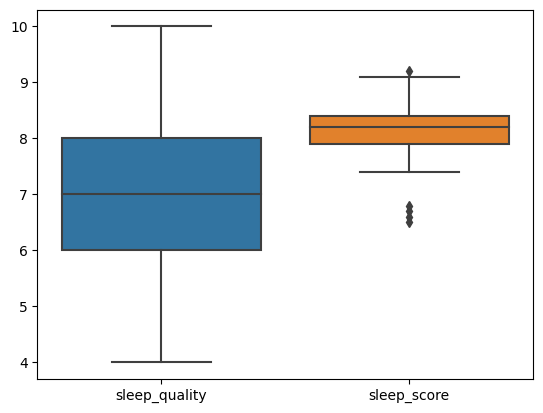

In [27]:
ax = sns.boxplot(data=df_full[['sleep_quality', 'sleep_score']])
ax.set_xticklabels(['sleep_quality', 'sleep_score'])
plt.show()

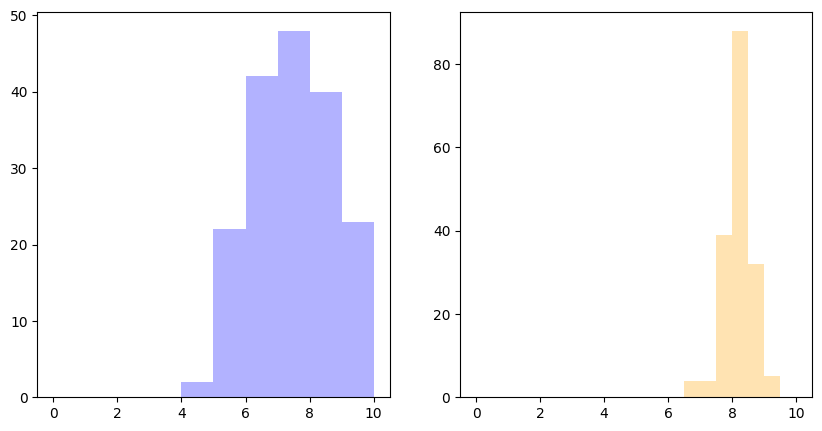

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].hist(df_full['sleep_quality'], color='blue', alpha=0.3, range=(0,10))
axes[1].hist(df_full['sleep_score'], color='orange', alpha=0.3, range=(0,10), bins=20)
plt.show()

–ù–∞ –ø–µ—Ä–≤—ã–π –≤–∑–≥–ª—è–¥, –º–æ—è —Å—É–±—ä–µ–∫—Ç–∏–≤–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ —Å–Ω–∞ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –æ—Ü–µ–Ω–∫–∏ —Ñ–∏—Ç–Ω–µ—Å-–±—Ä–∞—Å–ª–µ—Ç–∞. –ü—Ä–æ–≤–µ—Ä–∏–º, –Ω–∞—Å–∫–æ–ª—å–∫–æ —ç—Ç–æ —Ä–∞–∑–Ω–∏—Ü–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞.

H0: –æ—Ü–µ–Ω–∫–∏ –Ω–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è.  
Ha: –æ—Ü–µ–Ω–∫–∏ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è.  
p = 0.05

–î–∏—Å–ø–µ—Ä—Å–∏–∏ —É –≤—ã–±–æ—Ä–æ–∫ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è; –≤–∏–∑—É–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –±–ª–∏–∑–∫–∏ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º.

In [29]:
stat, p = stats.normaltest(df_full['sleep_quality'], nan_policy='omit')
print(f"{p = }")
stat, p = stats.normaltest(df_full['sleep_score'], nan_policy='omit')
print(f"{p = }")

p = 0.025244186513850672
p = 2.6104710352478112e-06


–°–æ–≥–ª–∞—Å–Ω–æ —Ç–µ—Å—Ç–∞–º, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤ –≤—ã–±–æ—Ä–∫–∞—Ö –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ, –ø–æ—ç—Ç–æ–º—É –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏

In [30]:
stat, p = stats.mannwhitneyu(df_full['sleep_quality'], df_full['sleep_score'], nan_policy='omit')
print(f'Statistics={stat:.3f}, p={p:.10f}')

Statistics=6374.500, p=0.0000000000


–¢.–∫ —Ä-value –±–ª–∏–∑–∫–æ –∫ –Ω—É–ª—é, –æ—Ç–∫–ª–æ–Ω—è–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ç–æ–º, —á—Ç–æ –º–æ—è —Å—É–±—ä–µ–∫—Ç–∏–≤–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ —Å–Ω–∞ –Ω–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –æ—Ü–µ–Ω–∫–∏ —Ñ–∏—Ç–Ω–µ—Å-–±—Ä–∞—Å–ª–µ—Ç–∞. –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, *sleep_score* –Ω–µ –º–æ–∂–µ—Ç –∑–∞–º–µ–Ω–∏—Ç—å —Ü–µ–ª–µ–≤–æ–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å *sleep_quality*, –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –≤ –∞–Ω–∞–ª–∏–∑–µ –∑–∞–ø–∏—Å–µ–π –∑–∞ 31.10.22 - 02.11.22 –∏ 01.05.23 –Ω–µ –∏–º–µ–µ—Ç —Å–º—ã—Å–ª–∞.

In [31]:
df_full.drop(index=['2022-10-31', '2022-11-01', '2022-11-02', '2023-05-01'], axis=0, inplace=True)
df_full[df_full.isna().any(axis=1)]

water_ml  coffee_ml coffee_after_8pm  tea_ml tea_after_8pm   
date                                                                     
2023-04-14    1000.0        0.0            False  1200.0          True  \
2023-04-15    1200.0        0.0            False  1200.0          True   
2023-04-16     900.0        0.0            False  1200.0          True   
2023-04-17     900.0      500.0             True  1200.0         False   
2023-04-23    1200.0     1500.0             True     0.0         False   
2023-04-24    1200.0     1000.0            False   300.0          True   
2023-04-25    1200.0     1000.0            False   600.0          True   
2023-04-26     900.0     1500.0             True     0.0         False   
2023-04-27     900.0     1000.0            False     0.0         False   

                last_meal_time exercise  menstrual_cycle_day   
date                                                           
2023-04-14 2023-04-14 10:34:00    False                 20.0  \
2023-04-15 2023-04-15 21:05:00     True                 21.0   
2023-04-16 2023-04-16 20:15:00    False                 22.0   
2023-04-17 2023-04-17 21:03:00    False                 23.0   
2023-04-23 2023-04-23 23:46:00    False                  1.0   
2023-04-24 2023-04-24 23:33:00    False                  2.0   
2023-04-25 2023-04-25 23:01:00    False                  3.0   
2023-04-26 2023-04-26 21:21:00    False                  4.0   
2023-04-27 2023-04-27 21:05:00    False                  5.0   

            atmospheric_pressure  sleep_quality  ... max_stress   steps   
date                                             ...                      
2023-04-14                 754.0            9.0  ...       76.0  8182.0  \
2023-04-15                 759.0            8.0  ...        NaN     NaN   
2023-04-16                 759.0            7.0  ...        NaN     NaN   
2023-04-17                 758.0            6.0  ...        NaN     NaN   
2023-04-23                 757.0            7.0  ...       82.0   401.0   
2023-04-24                 755.0            6.0  ...       83.0  3185.0   
2023-04-25                 755.0            6.0  ...       69.0   415.0   
2023-04-26                 754.0            6.0  ...       77.0   752.0   
2023-04-27                 751.0            7.0  ...        NaN   729.0   

            avg_spo2  min_heart_rate  avg_heart_rate  max_heart_rate   
date                                                                   
2023-04-14      93.0            55.0            87.0           133.0  \
2023-04-15       NaN             NaN             NaN             NaN   
2023-04-16       NaN             NaN             NaN             NaN   
2023-04-17       NaN             NaN             NaN             NaN   
2023-04-23      93.0            57.0            87.0           122.0   
2023-04-24      93.0            65.0            93.0           150.0   
2023-04-25      94.0            69.0            87.0           130.0   
2023-04-26      93.0            64.0            90.0           137.0   
2023-04-27       NaN            53.0            94.0           131.0   

            calories        wake_up_time  sleep_duration  sleep_score  
date                                                                   
2023-04-14     549.0                 NaT             NaN          NaN  
2023-04-15       NaN                 NaT             NaN          NaN  
2023-04-16       NaN                 NaT             NaN          NaN  
2023-04-17       NaN 2023-04-18 07:00:00           375.0          8.1  
2023-04-23     344.0                 NaT             NaN          NaN  
2023-04-24     766.0                 NaT             NaN          NaN  
2023-04-25     366.0                 NaT             NaN          NaN  
2023-04-26     592.0                 NaT             NaN          NaN  
2023-04-27     222.0                 NaT             NaN          NaN  

[9 rows x 23 columns]

## EDA

–¢–∞–∫ –∫–∞–∫ –æ—Å–Ω–æ–≤–Ω–∞—è –∑–∞–¥–∞—á–∞ —ç—Ç–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ - –Ω–∞–π—Ç–∏ –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –≤ –¥–∞–Ω–Ω—ã—Ö, –Ω–∞—á–Ω–µ–º —Å pairplot.

In [32]:
df_full.columns

Index(['water_ml', 'coffee_ml', 'coffee_after_8pm', 'tea_ml', 'tea_after_8pm',
       'last_meal_time', 'exercise', 'menstrual_cycle_day',
       'atmospheric_pressure', 'sleep_quality', 'went_to_bed_time',
       'min_stress', 'avg_stress', 'max_stress', 'steps', 'avg_spo2',
       'min_heart_rate', 'avg_heart_rate', 'max_heart_rate', 'calories',
       'wake_up_time', 'sleep_duration', 'sleep_score'],
      dtype='object')

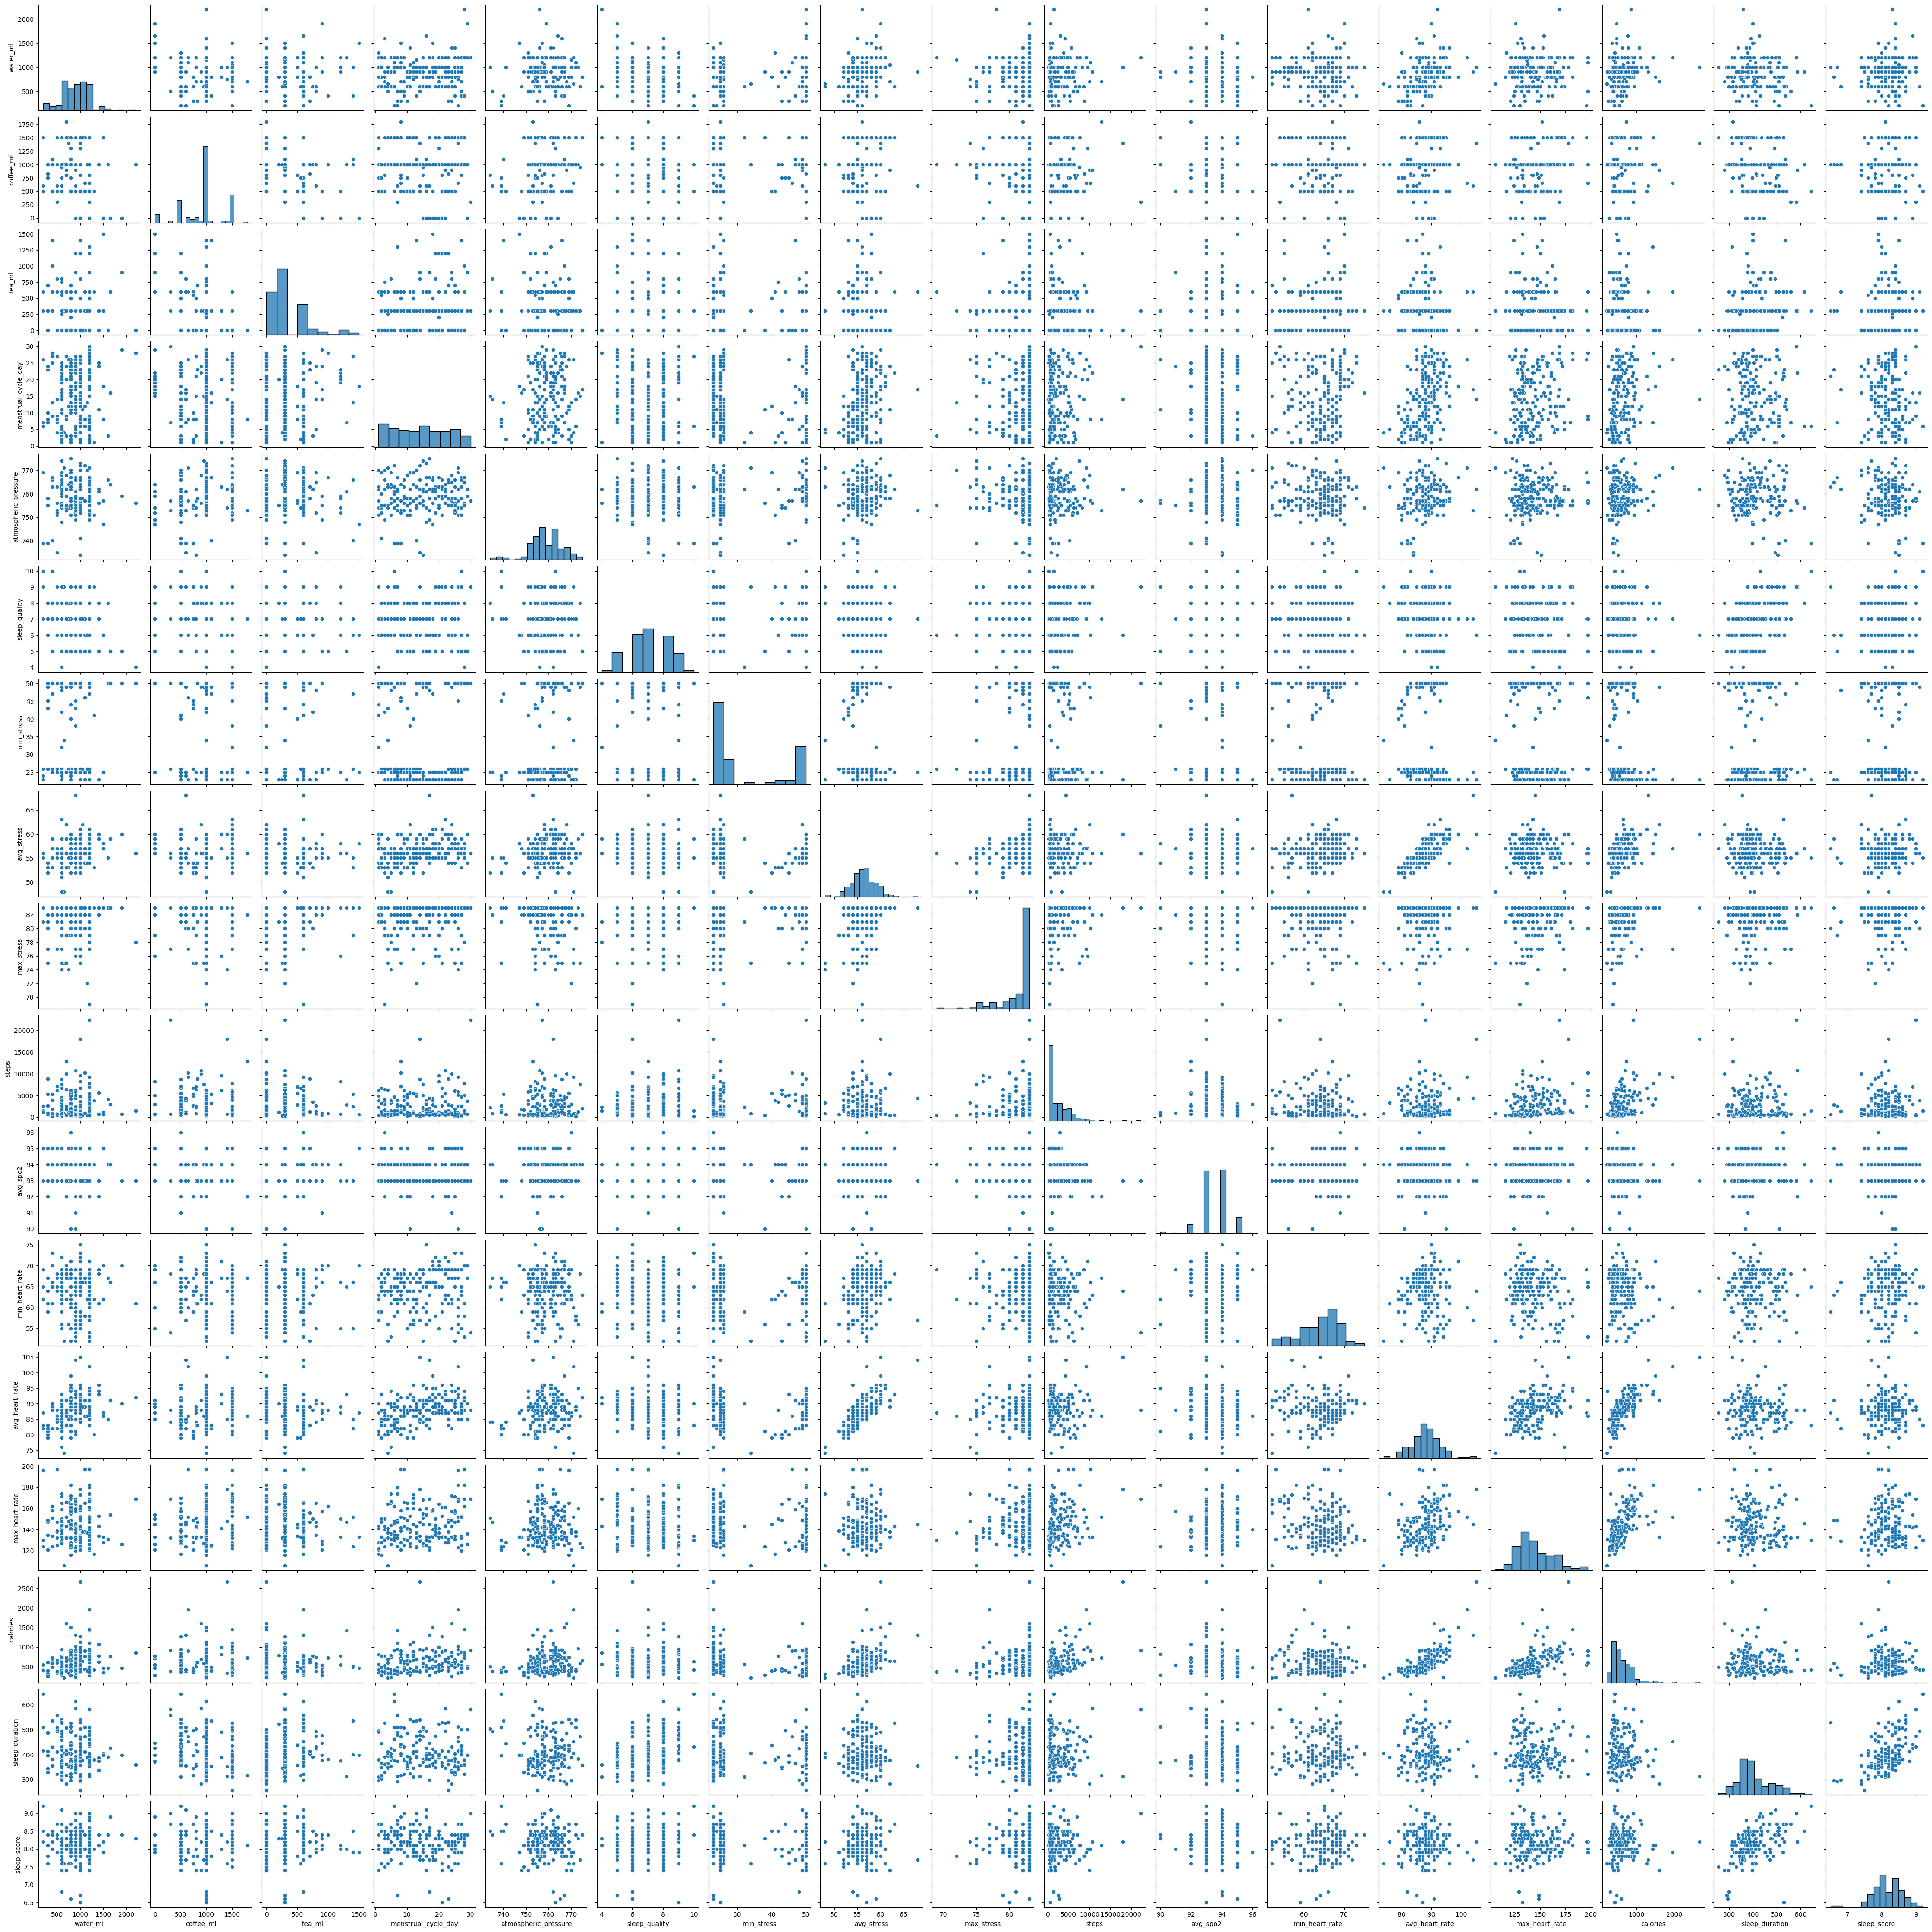

In [34]:
cols = ['water_ml', 'coffee_ml', 'tea_ml', 'menstrual_cycle_day', 'atmospheric_pressure', 'sleep_quality', 'min_stress', 'avg_stress', 'max_stress', 'steps', 
        'avg_spo2', 'min_heart_rate', 'avg_heart_rate', 'max_heart_rate', 'calories', 'sleep_duration', 'sleep_score']
sns.pairplot(df_full[cols])
plt.show()

–°—É—â–µ—Å—Ç–≤—É–µ—Ç –∑–∞–º–µ—Ç–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É —Å–æ–∂–∂–µ–Ω–Ω—ã–º–∏ –∫–∞–ª–æ—Ä–∏—è–º–∏, –ø—Ä–æ–π–¥–µ–Ω–Ω—ã–º–∏ —à–∞–≥–∞–º–∏ –∏ —á–∞—Å—Ç–æ—Ç–æ–π —Å–µ—Ä–¥—Ü–µ–±–∏–µ–Ω–∏—è, –∞ —Ç–∞–∫–∂–µ —á–∞—Å—Ç–æ—Ç–æ–π —Å–µ—Ä–¥—Ü–µ–±–∏–µ–Ω–∏—è –∏ —É—Ä–æ–≤–Ω–µ–º —Å—Ç—Ä–µ—Å—Å–∞.
–ö—Ä–æ–º–µ —Ç–æ–≥–æ, —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é —Å–Ω–∞ –∏ –æ—Ü–µ–Ω–∫–æ–π –∫–∞—á–µ—Å—Ç–≤–∞ —Å–Ω–∞ —Ñ–∏—Ç–Ω–µ—Å-–±—Ä–∞—Å–ª–µ—Ç–æ–º.

–ú–æ—è –∂–µ –æ—Ü–µ–Ω–∫–æ–π –∫–∞—á–µ—Å—Ç–≤–∞ —Å–Ω–∞ –Ω–∏ –æ—Ç –∫–∞–∫–æ–≥–æ –∏–∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤–∏–¥–∏–º–æ –Ω–µ –∑–∞–≤–∏—Å–∏—Ç.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –±–æ–ª–µ–µ –¥–µ—Ç–∞–ª—å–Ω–æ.

***
#### –ù–∞—á–Ω–µ–º —Å –∫–æ—Ñ–µ.

–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ, —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –±–æ–ª—å—à–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–æ—Ñ–µ –º–æ–∂–µ—Ç –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ —Å–∫–∞–∑—ã–≤–∞—Ç—å—Å—è –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–µ —Å–Ω–∞. –¢–∞–∫ –∫–∞–∫ —ç—Ñ—Ñ–µ–∫—Ç –æ—Ç —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –∏–ª–∏ –æ—Ç–∫–∞–∑–∞ –æ—Ç –∫–æ—Ñ–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –æ—Ç—Å—Ä–æ—á–µ–Ω–Ω—ã–º, –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∏–Ω–∞–º–∏–∫—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π.

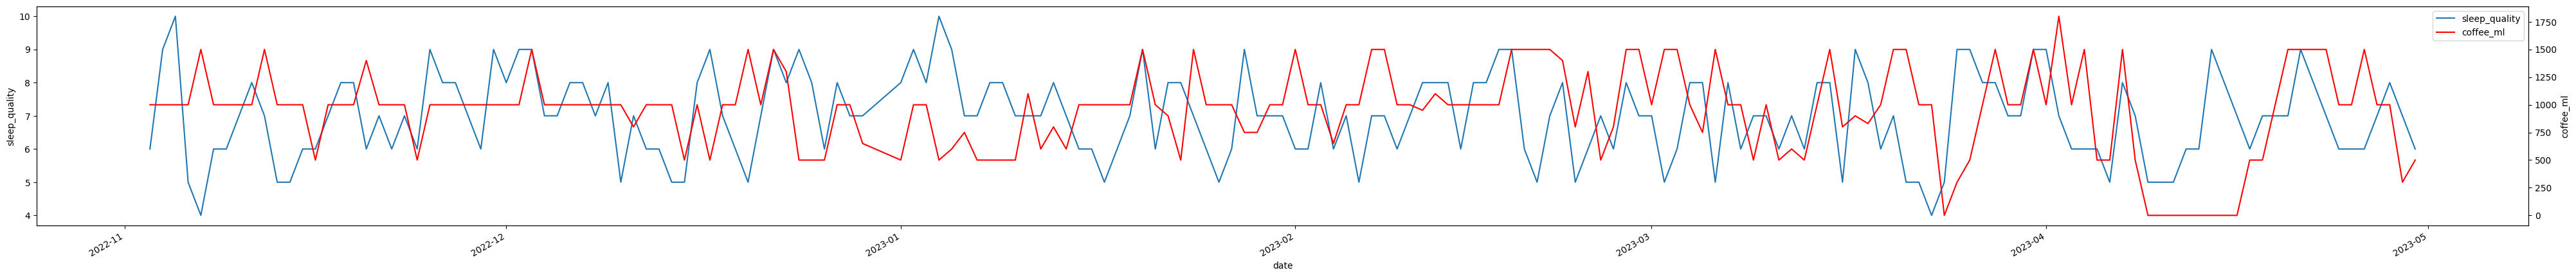

In [35]:
ax = df_full.plot(y='sleep_quality', legend=False, ylabel='sleep_quality', figsize=(50,5))
ax2 = ax.twinx()
df_full.plot(y='coffee_ml', ax=ax2, legend=False, ylabel='coffee_ml', color='r')
ax.figure.legend(bbox_to_anchor=(.90, 0.88))
plt.show()

–í –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å–ª—É—á–∞—è—Ö, —Ö–æ—Ç—å –∏ –Ω–µ –≤–æ –≤—Å–µ—Ö, —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –∏–ª–∏ —Å–Ω–∏–∂–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –≤—ã–ø–∏—Ç–æ–≥–æ –∫–æ—Ñ–µ (–∫—Ä–∞—Å–Ω–∞—è –ª–∏–Ω–∏—è) —Å–æ–ø—Ä–æ–≤–æ–∂–¥–∞–µ—Ç—Å—è —É—Ö—É–¥—à–µ–Ω–∏–µ–º –∏–ª–∏ —É–ª—É—á—à–µ–Ω–∏–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –∫–∞—á–µ—Å—Ç–≤–∞ —Å–Ω–∞ —á–µ—Ä–µ–∑ –Ω–µ—Å–∫–æ–ª—å–∫–æ –¥–Ω–µ–π (—Å–∏–Ω—è—è –ª–∏–Ω–∏—è).   
–¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, —Ç–∞–∫–∂–µ –µ—Å—Ç—å –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –æ—Ç—Ä–µ–∑–∫–∏, –∫–æ–≥–¥–∞ –∫–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞ –∑–∞–º–µ—Ç–Ω–æ –∏–∑–º–µ–Ω—è–ª–æ—Å—å –∏ –ø—Ä–∏ –Ω–µ–∏–∑–º–µ–Ω–Ω–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –≤—ã–ø–∏—Ç–æ–≥–æ –∫–æ—Ñ–µ.

–ò–∑–º–µ–Ω—è—Ç—Å—è –ª–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏, –µ—Å–ª–∏ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –∫–æ—Ñ–µ –∏ —á–∞–π? –í–µ–¥—å –≤ —á–∞–µ —Ç–∞–∫–∂–µ —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –∫–æ—Ñ–µ–∏–Ω–∞.

In [36]:
coffee_tea = df_full[['sleep_quality', 'coffee_ml', 'tea_ml']].copy()
coffee_tea['caffeine'] = coffee_tea['coffee_ml'] + coffee_tea['tea_ml']
coffee_tea.head()

sleep_quality  coffee_ml  tea_ml  caffeine
date                                                  
2022-11-03            6.0     1000.0   300.0    1300.0
2022-11-04            9.0     1000.0   300.0    1300.0
2022-11-05           10.0     1000.0   300.0    1300.0
2022-11-06            5.0     1000.0   600.0    1600.0
2022-11-07            4.0     1500.0     0.0    1500.0

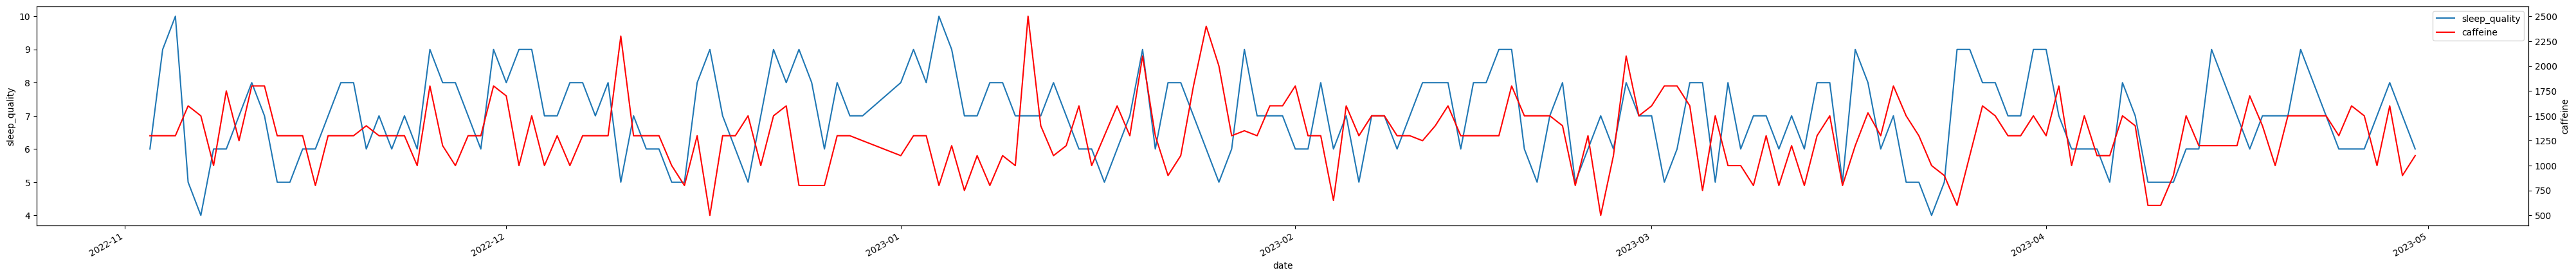

In [37]:
ax = coffee_tea.plot(y='sleep_quality', legend=False, ylabel='sleep_quality', figsize=(50,5))
ax2 = ax.twinx()
coffee_tea.plot(y='caffeine', ax=ax2, legend=False, ylabel='caffeine', color='r')
ax.figure.legend(bbox_to_anchor=(.90, 0.88))
plt.show()

–•–æ—Ç—è –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø—Ä–æ–º–µ–∂—É—Ç–∫–∞—Ö —Å–≤—è–∑—å —Å—Ç–∞–ª–∞ –±–æ–ª–µ–µ –∑–∞–º–µ—Ç–Ω–æ–π, –≤ –¥—Ä—É–≥–∏—Ö –æ–Ω–∞ –Ω–∞–æ–±–æ—Ä–æ—Ç —Å—Ç–∞–ª–∞ –º–µ–Ω–µ–µ –≤—ã—Ä–∞–∂–µ–Ω–Ω–æ–π.

–í–æ–∑–º–æ–∂–Ω–æ, –≤–∞–∂–Ω–æ –Ω–µ –æ–±—ä–µ–º –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–Ω—ã—Ö —á–∞—è –∏ –∫–æ—Ñ–µ, –∞ –±—ã–ª–∏ –ª–∏ –æ–Ω–∏ –≤—ã–ø–∏—Ç—ã –Ω–µ–∑–∞–¥–æ–ª–≥–æ –¥–æ —Å–Ω–∞.

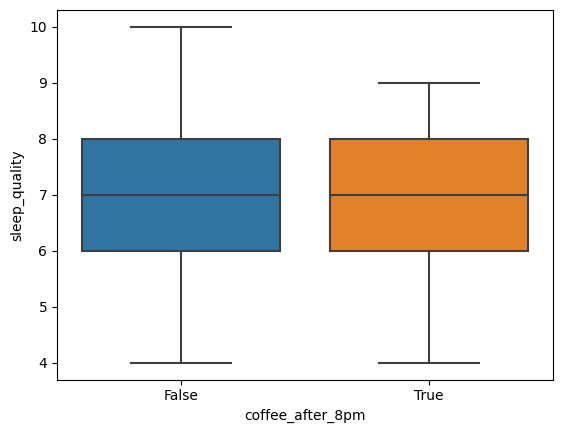

In [38]:
ax = sns.boxplot(data=df_full, x='coffee_after_8pm', y='sleep_quality')
plt.show()

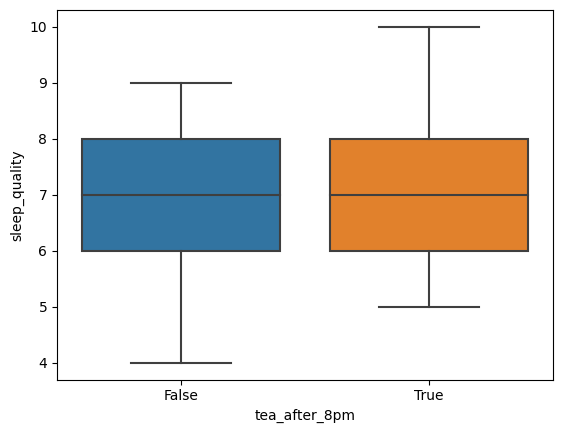

In [39]:
ax = sns.boxplot(data=df_full, x='tea_after_8pm', y='sleep_quality')
plt.show()

–ó–∞–º–µ—Ç–Ω–æ–π —Ä–∞–∑–Ω–∏—Ü—ã –≤ –¥–∞–Ω–Ω—ã—Ö –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è.

–ò–∑–≤–µ—Å—Ç–Ω–æ —Ç–∞–∫–∂–µ, —á—Ç–æ —á–∞–π –∏ –∫–æ—Ñ–µ –≤—ã–≤–æ–¥—è—Ç –∏–∑ –æ—Ä–≥–∞–Ω–∏–∑–º–∞ –≤–æ–¥—É. –í–æ–∑–º–æ–∂–Ω–æ —ç—Ñ—Ñ–µ–∫—Ç —á–∞—è –∏ –∫–æ—Ñ–µ –Ω–∞ —Å–æ–Ω –∑–∞–≤–∏—Å–∏—Ç —Ç–∞–∫–∂–µ –æ—Ç –≤—ã–ø–∏—Ç–æ–π –≤ —ç—Ç–æ—Ç –¥–µ–Ω—å –≤–æ–¥—ã.

In [40]:
cofteawat = df_full[['sleep_quality', 'coffee_ml', 'tea_ml', 'water_ml']].copy()
cofteawat['caffeine_minus_water'] = cofteawat['coffee_ml'] + cofteawat['tea_ml'] - cofteawat['water_ml']
cofteawat.head()

sleep_quality  coffee_ml  tea_ml  water_ml  caffeine_minus_water
date                                                                        
2022-11-03            6.0     1000.0   300.0    1000.0                 300.0
2022-11-04            9.0     1000.0   300.0     800.0                 500.0
2022-11-05           10.0     1000.0   300.0     400.0                 900.0
2022-11-06            5.0     1000.0   600.0    1200.0                 400.0
2022-11-07            4.0     1500.0     0.0     600.0                 900.0

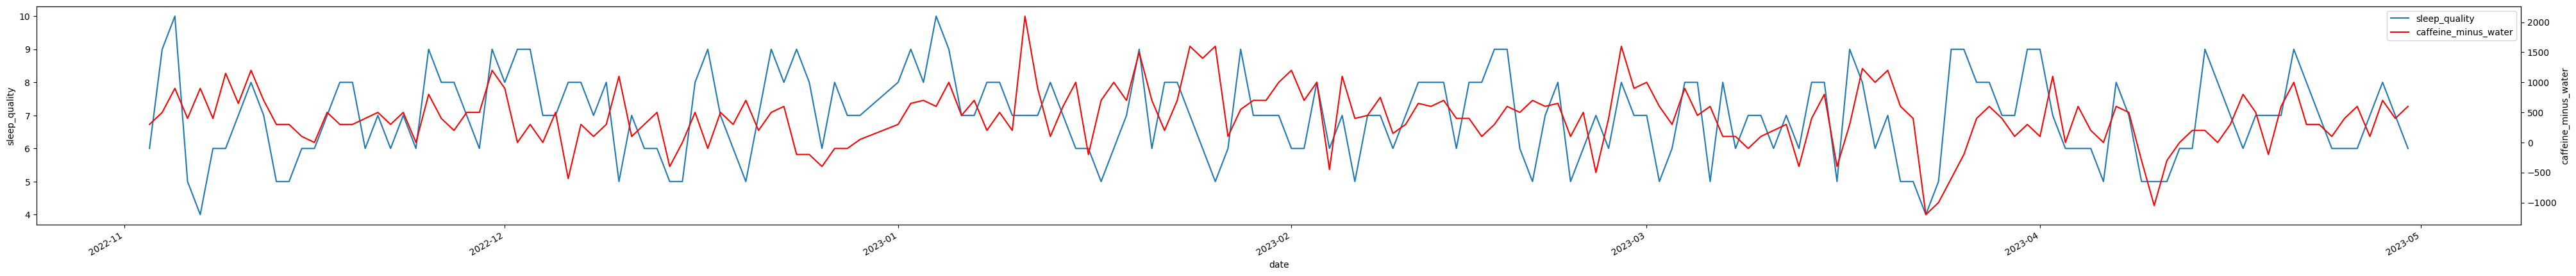

In [41]:
ax = cofteawat.plot(y='sleep_quality', legend=False, ylabel='sleep_quality', figsize=(50,5))
ax2 = ax.twinx()
cofteawat.plot(y='caffeine_minus_water', ax=ax2, legend=False, ylabel='caffeine_minus_water', color='r')
ax.figure.legend(bbox_to_anchor=(.90, 0.88))
plt.show()

–°–Ω–æ–≤–∞, –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –ø—Ä–æ–º–µ–∂—É—Ç–∫–∞—Ö —Å–≤—è–∑—å —Å—Ç–∞–ª–∞ –±–æ–ª–µ–µ –∑–∞–º–µ—Ç–Ω–æ–π, –≤ –¥—Ä—É–≥–∏—Ö –æ–Ω–∞ –Ω–∞–æ–±–æ—Ä–æ—Ç —Å—Ç–∞–ª–∞ –º–µ–Ω–µ–µ –≤—ã—Ä–∞–∂–µ–Ω–Ω–æ–π.

***
#### –°–æ–≤—ã –∏ –∂–∞–≤–æ—Ä–æ–Ω–∫–∏

–î—Ä—É–≥–∏–º –ª–æ–≥–∏—á–Ω—ã–º —Ñ–∞–∫—Ç–æ—Ä–æ–º, –≤–ª–∏—è—é—â–∏–º –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞, —è–≤–ª—è–µ—Ç—Å—è –≤—Ä–µ–º—è –∑–∞—Å—ã–ø–∞–Ω–∏—è –∏ –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è, –∞ —Ç–∞–∫–∂–µ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞.

–ù–∞—á–Ω–µ–º —Å –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.

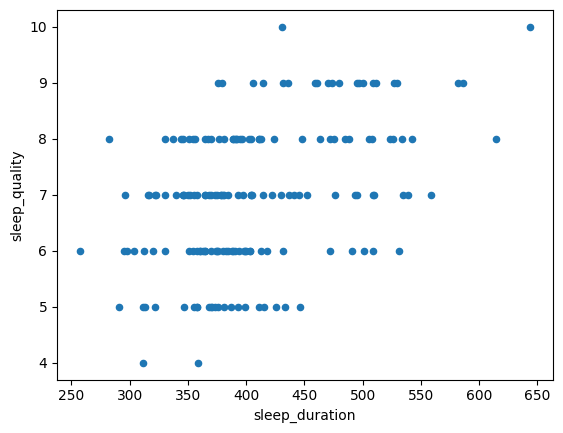

In [42]:
df_full.plot(kind='scatter', x='sleep_duration', y='sleep_quality')
plt.show()

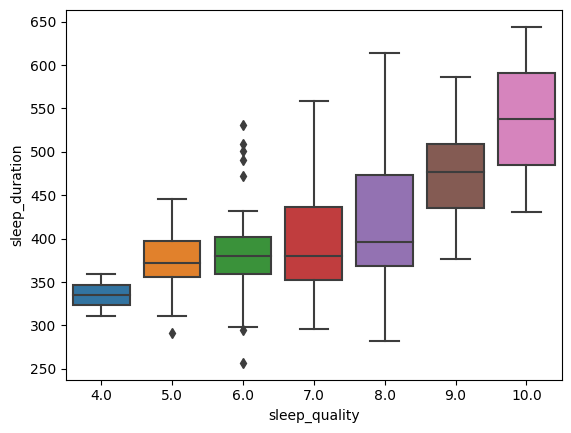

In [43]:
sns.boxplot(data=df_full, y='sleep_duration', x='sleep_quality')
plt.show()

–°—É–¥—è –ø–æ –±–æ–∫—Å–ø–ª–æ—Ç—É, –º–µ–∂–¥—É –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é —Å–Ω–∞ –∏ –µ–≥–æ –∫–∞—á–µ—Å—Ç–≤–æ–º –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –º–æ–∂–µ—Ç —Å—É—â–µ—Å—Ç–≤–æ–≤–∞—Ç—å —Å–≤—è–∑—å.

In [44]:
values = []
names = []

for_oneway = []

for mark in sorted(df_full['sleep_quality'].unique()):
    vals = list(df_full[df_full['sleep_quality']==mark]['sleep_duration'].dropna())
    values += vals
    names += [mark] * len(vals)

    for_oneway.append(vals)

tukey = pairwise_tukeyhsd(endog=values, groups=names, alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   4.0    5.0  37.9091  0.983 -100.7634 176.5816  False
   4.0    6.0  48.7179 0.9364  -87.4126 184.8485  False
   4.0    7.0  64.4444 0.7914  -71.2427 200.1316  False
   4.0    8.0  84.2308 0.5182  -51.8998 220.3613  False
   4.0    9.0   141.15 0.0447    1.9009 280.3991   True
   4.0   10.0    202.5 0.0255   14.7366 390.2634   True
   5.0    6.0  10.8089 0.9952  -39.2559  60.8736  False
   5.0    7.0  26.5354 0.6684  -22.3109  75.3816  False
   5.0    8.0  46.3217 0.0899   -3.7431  96.3865  False
   5.0    9.0 103.2409    0.0     45.23 161.2518   True
   5.0   10.0 164.5909 0.0091   25.9184 303.2634   True
   6.0    7.0  15.7265 0.9137  -25.3518  56.8048  False
   6.0    8.0  35.5128 0.1685   -7.0072  78.0329  False
   6.0    9.0  92.4321    0.0   40.7916 144.0725   True
   6.0   10.0 153.7821 0.0159   17.6515 289.9126

In [45]:
fval2, pval2 = stats.f_oneway(*for_oneway)
print(f"–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = {fval2:.5f}, p = {pval2:.5f}")

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = 8.22526, p = 0.00000


–ò—Å—Ö–æ–¥—è –∏–∑ —Ç–µ—Å—Ç–æ–≤, –µ—Å—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ –≤ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å–Ω–∞ –¥–ª—è –≥—Ä—É–ø–ø —Å —Ä–∞–∑–Ω–æ–π –æ—Ü–µ–Ω–∫–æ–π –∫–∞—á–µ—Å—Ç–≤–∞ —Å–Ω–∞. –ë–æ–ª—å—à–∞—è –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞ —á–∞—Å—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç –≤—ã—à–µ –µ–≥–æ –∫–∞—á–µ—Å—Ç–≤–æ. 

–ö–∞–∫ –Ω–∞—Å—á–µ—Ç –≤—Ä–µ–º–µ–Ω–∏ –∑–∞—Å—ã–ø–∞–Ω–∏—è?

–°–Ω–∞—á–∞–ª–∞ –≤—ã–¥–µ–ª–∏–º –∏–∑ –∫–æ–ª–æ–Ω–∫–∏ *went_to_bed_time* –≤—Ä–µ–º—è, —Ç–∞–∫ –∫–∞–∫ –¥–∞—Ç–∞ –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ –Ω–µ –∏–º–µ–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è.

In [46]:
bedtime = df_full[['sleep_quality', 'went_to_bed_time', 'wake_up_time']].copy().dropna()

bedtime['went_to_bed_time'] = bedtime['went_to_bed_time'].dt.hour*60 + bedtime['went_to_bed_time'].dt.minute
bedtime['went_to_bed_time'][bedtime['went_to_bed_time'] > 720] = bedtime['went_to_bed_time'] - 1440

bedtime['wake_up_time'] = bedtime['wake_up_time'].dt.hour*60 + bedtime['wake_up_time'].dt.minute
bedtime.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169 entries, 2022-11-03 to 2023-04-30
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sleep_quality     169 non-null    float64
 1   went_to_bed_time  169 non-null    int32  
 2   wake_up_time      169 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 4.0 KB


C:\Users\lina1\AppData\Local\Temp\ipykernel_5996\3689585794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bedtime['went_to_bed_time'][bedtime['went_to_bed_time'] > 720] = bedtime['went_to_bed_time'] - 1440


In [47]:
bedtime.sort_values('went_to_bed_time', inplace=True)

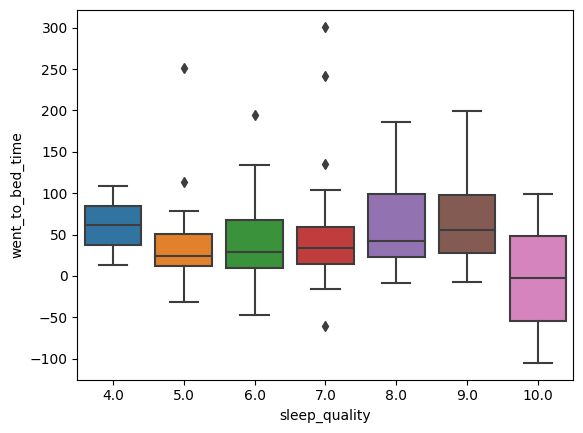

In [48]:
sns.boxplot(data=bedtime, y='went_to_bed_time', x='sleep_quality')
plt.show()

In [49]:
values = []
names = []

for_oneway = []

for mark in sorted(bedtime['sleep_quality'].unique()):
    vals = list(bedtime[bedtime['sleep_quality']==mark]['went_to_bed_time'].dropna())
    values += vals
    names += [mark] * len(vals)

    for_oneway.append(vals)

tukey = pairwise_tukeyhsd(endog=values, groups=names, alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   4.0    5.0 -21.7273 0.9986 -146.8929 103.4383  False
   4.0    6.0  -20.359 0.9989 -143.2302 102.5123  False
   4.0    7.0 -14.6889 0.9998 -137.1599 107.7821  False
   4.0    8.0   0.4872    1.0 -122.3841 123.3584  False
   4.0    9.0      6.6    1.0  -119.086  132.286  False
   4.0   10.0    -64.0 0.9188  -233.475  105.475  False
   5.0    6.0   1.3683    1.0  -43.8201  46.5567  False
   5.0    7.0   7.0384 0.9991  -37.0501  51.1269  False
   5.0    8.0  22.2145 0.7634   -22.974  67.4029  False
   5.0    9.0  28.3273 0.6727  -24.0333  80.6878  False
   5.0   10.0 -42.2727 0.9515 -167.4383  82.8929  False
   6.0    7.0   5.6701 0.9993  -31.4071  42.7473  False
   6.0    8.0  20.8462 0.6685  -17.5324  59.2247  False
   6.0    9.0   26.959 0.5991  -19.6516  73.5695  False
   6.0   10.0  -43.641 0.9386 -166.5123  79.2302

In [50]:
fval2, pval2 = stats.f_oneway(*for_oneway)
print(f"–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = {fval2:.5f}, p = {pval2:.5f}")

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = 1.22839, p = 0.29435


–ò—Å—Ö–æ–¥—è –∏–∑ —Ç–µ—Å—Ç–æ–≤, –Ω–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π —Ä–∞–∑–Ω–∏—Ü—ã –≤–æ –≤—Ä–µ–º–µ–Ω–∏ –∑–∞—Å—ã–ø–∞–Ω–∏—è –¥–ª—è –≥—Ä—É–ø–ø —Å —Ä–∞–∑–Ω–æ–π –æ—Ü–µ–Ω–∫–æ–π –∫–∞—á–µ—Å—Ç–≤–∞ —Å–Ω–∞.
–í–∏–¥–∏–º–æ, –Ω–µ —Ç–∞–∫ –≤–∞–∂–Ω–æ, –≤ –∫–∞–∫–æ–µ –≤—Ä–µ–º—è —è –ª–µ–≥–ª–∞ —Å–ø–∞—Ç—å –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏, —á—Ç–æ —è —Å–ø–∞–ª–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–æ–ª–≥–æ.

***
#### –ü–∏—Ç–∞–Ω–∏–µ –∏ —Ñ–∏–∑–∏—á–µ—Å–∫–∏–µ –Ω–∞–≥—Ä—É–∑–∫–∏

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –≤–ª–∏—è–µ—Ç –ª–∏ —Ä–µ–∂–∏–º –ø–∏—Ç–∞–Ω–∏—è –∏ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ–∫ –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞.

–ù–∞—á–Ω–µ–º —Å –ø–∏—Ç–∞–Ω–∏—è. –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ, –ø–æ–∑–¥–Ω–∏–π –ø—Ä–∏–µ–º –ø–∏—â–∏ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ —É—Ö—É–¥—à–µ–Ω–∏—é —Å–Ω–∞.

In [58]:
food = df_full[['last_meal_time', 'sleep_quality']].copy().dropna()

food['last_meal_time'] = food['last_meal_time'].dt.hour*60 + food['last_meal_time'].dt.minute
food.head()

last_meal_time  sleep_quality
date                                     
2022-11-03            1194            6.0
2022-11-04            1355            9.0
2022-11-05            1402           10.0
2022-11-06            1160            5.0
2022-11-07            1303            4.0

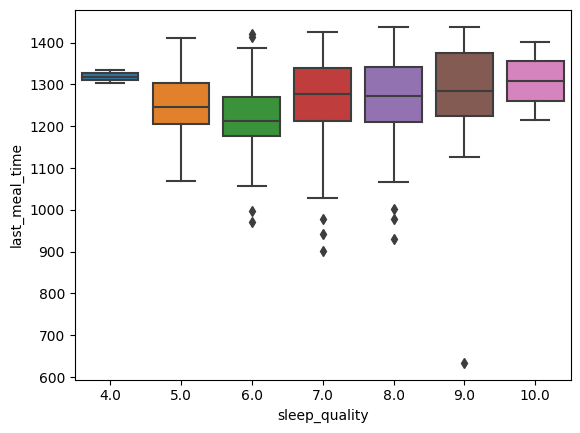

In [60]:
sns.boxplot(data=food, y='last_meal_time', x='sleep_quality')
plt.show()

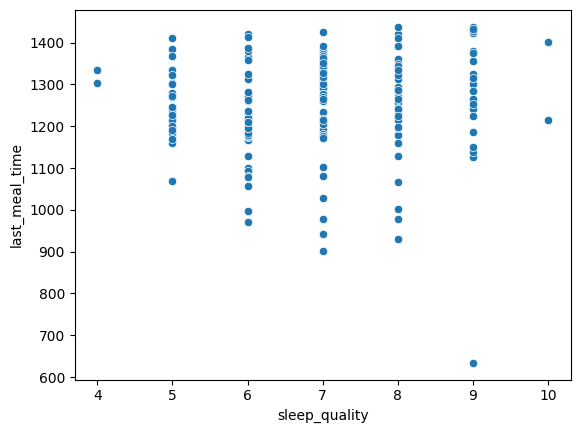

In [62]:
sns.scatterplot(data=food, y='last_meal_time', x='sleep_quality')
plt.show()

In [61]:
values = []
names = []

for mark in sorted(food['sleep_quality'].unique()):
    vals = list(food[food['sleep_quality']==mark]['last_meal_time'].dropna())
    values += vals
    names += [mark] * len(vals)

tukey = pairwise_tukeyhsd(endog=values, groups=names, alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
   4.0    5.0  -63.2727 0.9908 -323.4263 196.8809  False
   4.0    6.0 -100.2619 0.9032 -355.2015 154.6777  False
   4.0    7.0  -63.2292 0.9897 -317.4434 190.9851  False
   4.0    8.0    -61.65 0.9912 -316.8791 193.5791  False
   4.0    9.0  -55.7143 0.9954 -316.3835  204.955  False
   4.0   10.0     -11.0    1.0 -363.2496 341.2496  False
   5.0    6.0  -36.9892 0.8969 -129.6945  55.7161  False
   5.0    7.0    0.0436    1.0  -90.6482  90.7353  False
   5.0    8.0    1.6227    1.0  -91.8759  95.1213  False
   5.0    9.0    7.5584    1.0  -99.9058 115.0226  False
   5.0   10.0   52.2727 0.9968 -207.8809 312.4263  False
   6.0    7.0   37.0327 0.7535  -37.3936 111.4591  False
   6.0    8.0   38.6119  0.756  -39.2102  116.434  False
   6.0    9.0   44.5476 0.7948  -49.5951 138.6903  False
   6.0   10.0   89.2619 0.9427 

–ö–∞–∫ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏, —Ç–∞–∫ –∏ —Ç–µ—Å—Ç—ã –Ω–µ –ø–æ–∫–∞–∑–∞–ª–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –∫–∞—á–µ—Å—Ç–≤–∞ —Å–Ω–∞ –æ—Ç –≤—Ä–µ–º–µ–Ω–∏ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –ø—Ä–∏–µ–º–∞ –ø–∏—â–∏.

–¢–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ñ–∏–∑–∏—á–µ—Å–∫–∏–µ –Ω–∞–≥—Ä—É–∑–∫–∏.  
–ó–¥–µ—Å—å –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å —Ä–∞–∑–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏: *exercise*, *steps*, *calories*.  
–ù–∞—á–Ω–µ–º —Å–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –¥–Ω–µ–π —Å —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∞–º–∏ –∏ –±–µ–∑ –Ω–∏—Ö.

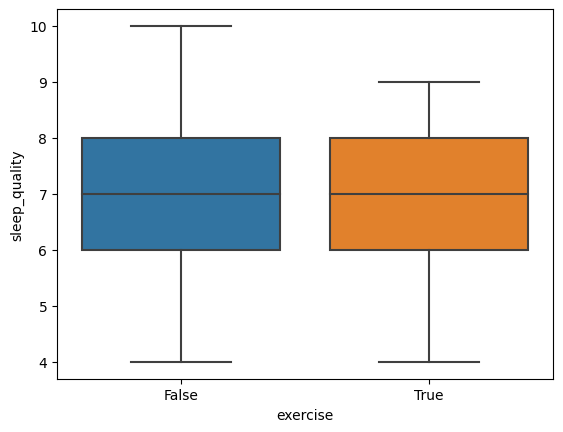

In [64]:
sns.boxplot(data=df_full, x='exercise', y='sleep_quality')
plt.show()

–í–∏–∑—É–∞–ª—å–Ω–æ –±–æ–ª—å—à–æ–π —Ä–∞–∑–Ω–∏—Ü—ã –Ω–µ –∑–∞–º–µ—Ç–Ω–æ. –ü–æ—Å–º–æ—Ç—Ä–∏–º –µ—Å—Ç—å –ª–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è.

H0: —Ä–∞–∑–ª–∏—á–∏–π –Ω–µ—Ç.  
Ha: —Ä–∞–∑–ª–∏—á–∏—è –µ—Å—Ç—å.  
p = 0.05

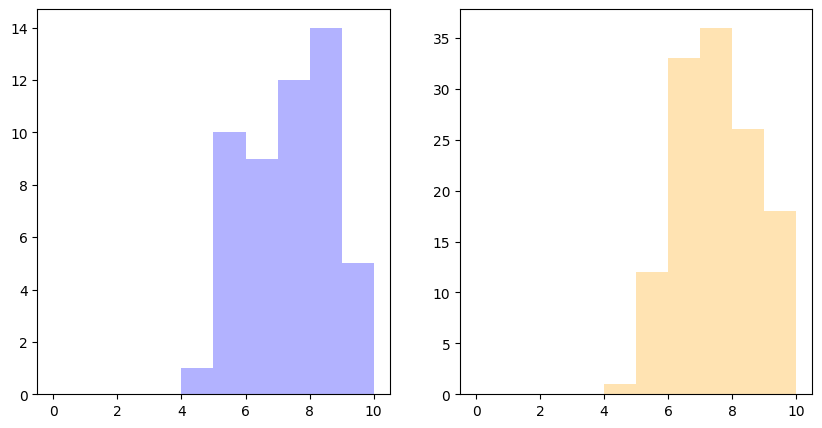

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].hist(df_full[df_full['exercise']==True]['sleep_quality'], color='blue', alpha=0.3, range=(0,10))
axes[1].hist(df_full[df_full['exercise']==False]['sleep_quality'], color='orange', alpha=0.3, range=(0,10))
plt.show()

–î–∏—Å–ø–µ—Ä—Å–∏–∏ —É –≤—ã–±–æ—Ä–æ–∫ –Ω–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è; –≤–∏–∑—É–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –±–ª–∏–∑–∫–∏ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º.

In [69]:
stat, p = stats.normaltest(df_full[df_full['exercise']==True]['sleep_quality'], nan_policy='omit')
print(f"{p = }")
stat, p = stats.normaltest(df_full[df_full['exercise']==False]['sleep_quality'], nan_policy='omit')
print(f"{p = }")

p = 0.04178152536451419
p = 0.18118212101010508


–°–æ–≥–ª–∞—Å–Ω–æ —Ç–µ—Å—Ç–∞–º, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤ –æ–¥–Ω–æ–π –∏–∑ –≤—ã–±–æ—Ä–æ–∫ –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ, –ø–æ—ç—Ç–æ–º—É –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏

In [70]:
stat, p = stats.mannwhitneyu(df_full[df_full['exercise']==True]['sleep_quality'], df_full[df_full['exercise']==False]['sleep_quality'], nan_policy='omit')
print(f'Statistics={stat:.3f}, p={p:.10f}')

Statistics=3014.000, p=0.5098372173


–ó–Ω–∞—á–µ–Ω–∏–µ p-value –Ω–µ –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É. –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É –¥–Ω—è–º–∏ —Å —Ñ–∏–∑–∏—á–µ—Å–∫–∏–º–∏ –Ω–∞–≥—Ä—É–∑–∫–∞–º–∏ –∏ –±–µ–∑ –Ω–∏—Ö –Ω–µ—Ç.

–¢–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —à–∞–≥–∏ –∏ —Å–æ–∂–∂–µ–Ω–Ω—ã–µ –∫–∞–ª–æ—Ä–∏–∏.

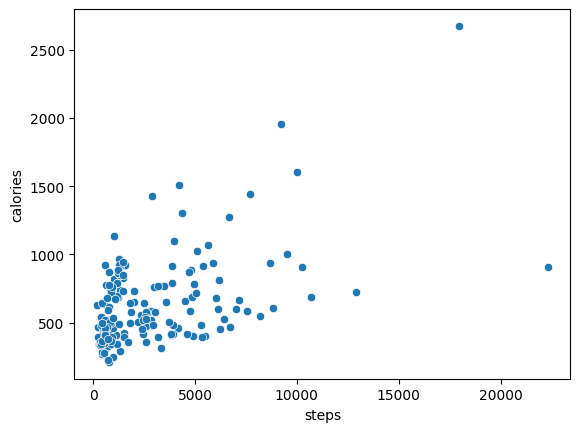

In [71]:
sns.scatterplot(data=df_full, x='steps', y='calories')
plt.show()

In [72]:
df_full[['steps', 'calories']].corr()

steps  calories
steps     1.000000  0.531904
calories  0.531904  1.000000

–ú–µ–∂–¥—É –ø—Ä–æ–π–¥–µ–Ω–Ω—ã–º–∏ —à–∞–≥–∞–º–∏ –∏ —Å–æ–∂–∂–µ–Ω–Ω—ã–º –∫–∞–ª–æ—Ä–∏—è–º–∏ –µ—Å—Ç—å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è, –Ω–æ —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∞ –Ω–µ —Å–∏–ª—å–Ω–∞—è, –ø—Ä–æ–≤–µ—Ä–∏–º –≤–ª–∏—è–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ –∏–∑ —ç—Ç–∏—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤.

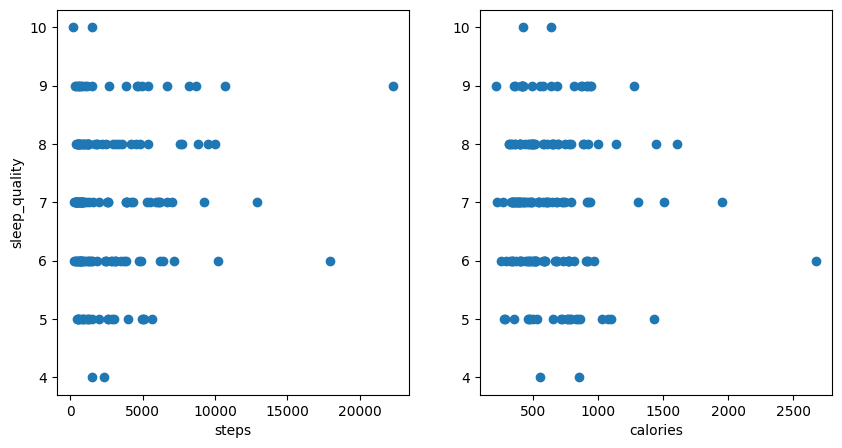

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].scatter(x=df_full['steps'], y=df_full['sleep_quality'])
axes[0].set_xlabel('steps')
axes[0].set_ylabel('sleep_quality')

axes[1].scatter(x=df_full['calories'], y=df_full['sleep_quality'])
axes[1].set_xlabel('calories')
plt.show()

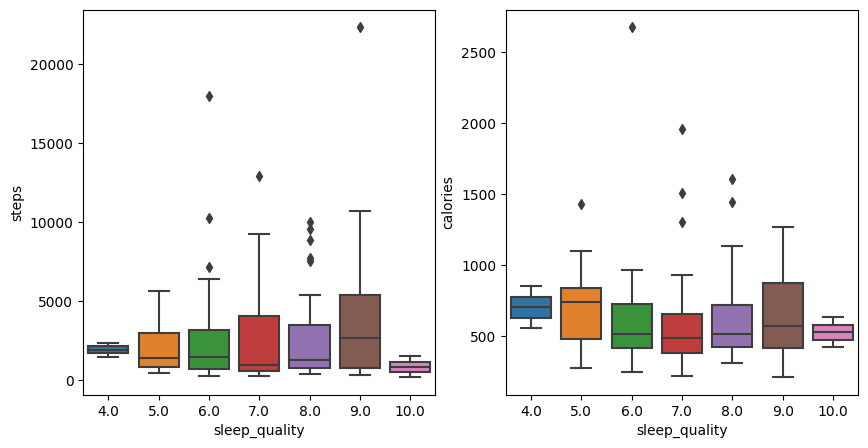

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.boxplot(data=df_full, x='sleep_quality', y='steps', ax=axes[0])
axes[0].set_ylabel('steps')
axes[0].set_xlabel('sleep_quality')

sns.boxplot(data=df_full, x='sleep_quality', y='calories', ax=axes[1])
axes[1].set_ylabel('calories')
plt.show()

–í–∏–∑—É–∞–ª—å–Ω–æ, —Ä–∞–∑–Ω–∏—Ü—ã –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ –Ω–µ –∑–∞–º–µ—Ç–Ω–æ.

***
#### –î—Ä—É–≥–∏–µ —Ñ–∞–∫—Ç–æ—Ä—ã

–£—Ä–æ–≤–µ–Ω—å —Å—Ç—Ä–µ—Å—Å–∞

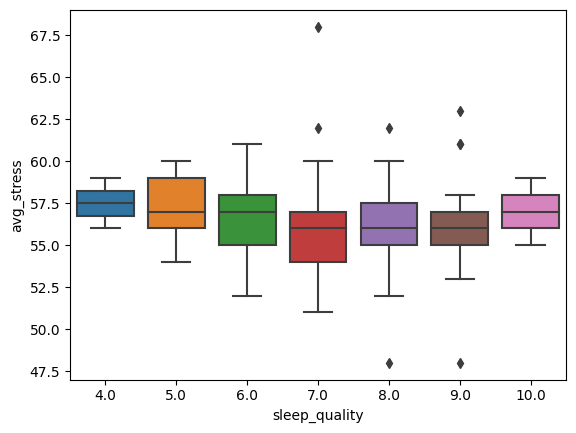

In [87]:
sns.boxplot(data=df_full, y='avg_stress', x='sleep_quality')
plt.show()

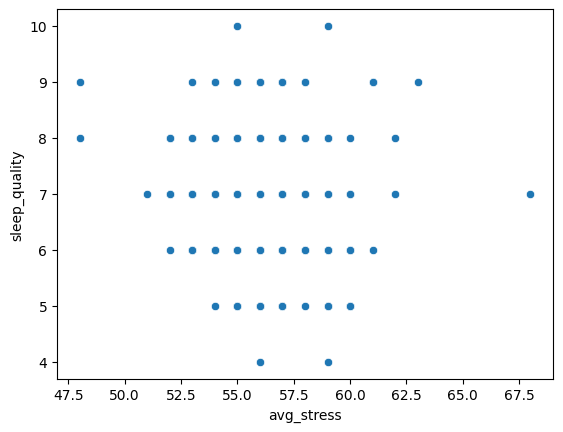

In [88]:
sns.scatterplot(data=df_full, x='avg_stress', y='sleep_quality')
plt.show()

–í–∏–∑—É–∞–ª—å–Ω–æ, –±–æ–ª—å—à–∏—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ –≥—Ä—É–ø–ø–∞—Ö –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è.

–ê—Ç–º–æ—Å—Ñ–µ—Ä–Ω–æ–µ –¥–∞–≤–ª–µ–Ω–∏–µ

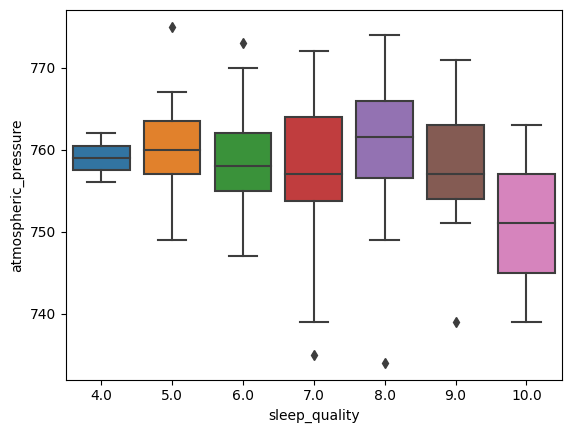

In [90]:
sns.boxplot(data=df_full, y='atmospheric_pressure', x='sleep_quality')
plt.show()

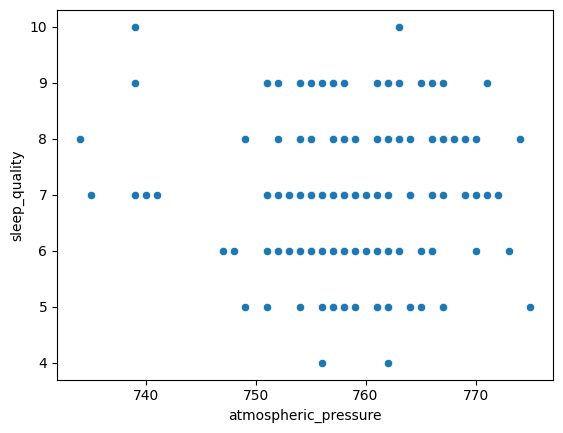

In [91]:
sns.scatterplot(data=df_full, x='atmospheric_pressure', y='sleep_quality')
plt.show()

–°—É–¥—è –ø–æ –≥—Ä–∞—Ñ–∏–∫–∞–º, –ø—Ä–∏ –Ω–∏–∑–∫–æ–º –∞—Ç–º–æ—Å—Ñ–µ—Ä–Ω–æ–º –¥–∞–≤–ª–µ–Ω–∏–∏ –∫–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞ –≤ —Å—Ä–µ–¥–Ω–µ–º –≤—ã—à–µ, –æ–¥–Ω–∞–∫–æ —ç—Ç–æ –≤–ø–æ–ª–Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –Ω–∏–∑–∫–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∞—Ç–º–æ—Å—Ñ–µ—Ä–Ω–æ–≥–æ –¥–∞–≤–ª–µ–Ω–∏—è —Ä–µ–¥–∫–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤ –≤—ã–±–æ—Ä–∫–µ.

–ú–µ–Ω—Å—Ç—Ä—É–∞–ª—å–Ω—ã–π —Ü–∏–∫–ª

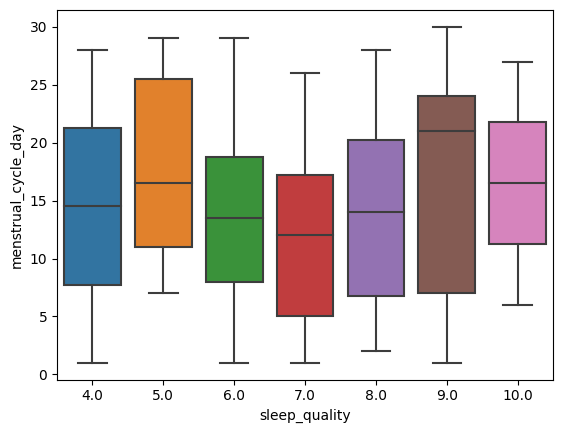

In [93]:
sns.boxplot(data=df_full, y='menstrual_cycle_day', x='sleep_quality')
plt.show()

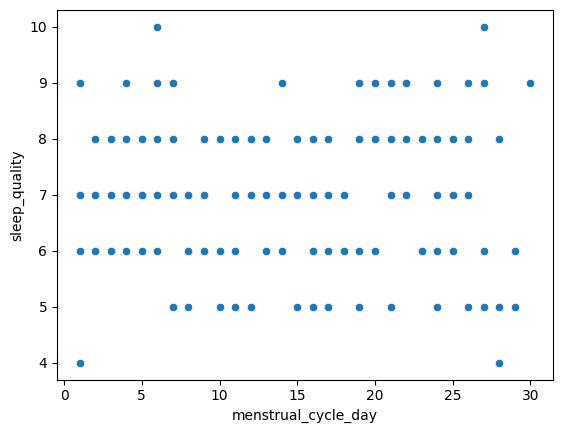

In [94]:
sns.scatterplot(data=df_full, x='menstrual_cycle_day', y='sleep_quality')
plt.show()

–í–∏–∑—É–∞–ª—å–Ω–æ, –±–æ–ª—å—à–∏—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ –≥—Ä—É–ø–ø–∞—Ö –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è.

### –í—ã–≤–æ–¥—ã

–ê–Ω–∞–ª–∏–∑ —Å–æ–±—Ä–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏–≤–µ–ª –º–µ–Ω—è –∫ –≤—ã–≤–æ–¥–∞–º, –∫–æ—Ç–æ—Ä—ã–µ —è —Ç–∞–∫ –Ω–µ —Ö–æ—Ç–µ–ª–∞ –ø—Ä–∏–∑–Ω–∞–≤–∞—Ç—å ~~(—á—Ç–æ–±—ã –æ–ø—Ä–æ–≤–µ—Ä–≥–Ω—É—Ç—å —ç—Ç–∏ –≤—ã–≤–æ–¥—ã —Å–∞–º –∞–Ω–∞–ª–∏–∑ –∏ –∑–∞—Ç–µ–≤–∞–ª—Å—è üòÑ)~~: —á—Ç–æ–±—ã –ª—É—á—à–µ –≤—ã—Å—ã–ø–∞—Ç—å—Å—è, –Ω—É–∂–Ω–æ —Å–ø–∞—Ç—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ä–µ–º–µ–Ω–∏ –∏, –≤–æ–∑–º–æ–∂–Ω–æ(!) ~~(—è –≤—Å–µ –µ—â–µ –Ω–µ –≥–æ—Ç–æ–≤–∞ –ø—Ä–∏–∑–Ω–∞—Ç—å —ç—Ç–æ –∏–∑-–∑–∞ –º–æ–µ–π –æ–≥—Ä–æ–º–Ω–æ–π –ª—é–±–≤–∏ –∫ –∫–æ—Ñ–µ)~~ –±—ã—Ç—å –æ—Å—Ç–æ—Ä–æ–∂–Ω–µ–π —Å –Ω–∞–ø–∏—Ç–∫–∞–º–∏, —Å–æ–¥–µ—Ä–∂–∞—â–∏–º–∏ –∫–æ—Ñ–µ–∏–Ω.